<h1 style="text-align:center;
            color:lightblue;
            font-size:48px;"><b>Fingerprint Matrix</b></h1>


## Table of contents

1. [Introduction](#Introduction)
 - [1.a SVD](#SVD)
2. [EDA](#EDA)
 - [2.a Zeros in data](#The-zero-factor)
3. [GD Algorithms](#GD-Algorithms)
4. [SRM MODEL](#SRM-Model)
5. [Conclusion](#4.-Conclusion)

## **Introduction**


<br>
In this fast-paced world, we frequently interact with people from different backgrounds who hold diverse beliefs and morals. Moreover, personal appearance varies for each individual.

We believe that each person has a unique marker that determines how they present themselves to the outside world.

Therefore, we want to investigate it using quantitative and empirical methods.

Following the article  “A Reduced-Dimension fMRI Shared Response Model” (Chen et al., 2015), we believe that after recording the facial muscles activation (action units) we can quantify the individual identity of each subject and the shared stimulus between all people.

We suggest that each individual will have a **weight matrix**, which is multiplied by the **universal stimulus matrix** (which is the same for all subjects). 

The multiplication of the **weight matrix** and the **stimulus matrix** will result in the **response matrix** of the individual.

Let's model it to make it clearer:

We have our underlying assumptions:

1. i = 1,2...,m for m **subjects**
2. We have our index v for different **voxels** and our index d for different **timeframes**
3. We'll define our matrix $X_i$ with dimensions $v_{rows}$ X $d_{columns}$

Let's write our suggested model:

For the matrices:  

$X_i \in \mathbb{R}^{v x d}$, $W_i \in \mathbb{R}^{v x k}$, $S \in \mathbb{R}^{k x d}$ : 

Model_1 is:

$$
X_i = W_i \cdot S + E_i \quad, \quad \text{ for i subject in our sample}
$$

Note: to ensure uniqueness of coordinates it is necessary that $W_i$ has
linearly independent columns.

Thus, in our model we make a bigger assumption that the weights matrix is **orthogonal**, meaning: $\quad W_i^T W_i = I _{k}$


Now we're going to optimize our $W_i$ in the following method:



    

1. Our goal is to **minimize** the `Reconstruction Error`:  

$$
Min_{W_i,S} \quad \sum_{i = 1}^{m} \| X_{i} - W_{i} S \|_F^2
$$

2. Select initial $W_i$
<br>

3. Set $S = \frac{1}{m} \sum_{i = 1}^{m} W_i^T X_i$
<br>

4. We have m separate subproblems of the form $ \quad \sum_{i = 1}^{m} \| X_{i} - W_{i} S \|_F^2$

<br>

5. Our solution for each subject in each iteration is:

$$
W_{i} = \tilde U_{i} \tilde V_{i}^T \quad \text{where} \quad \tilde U_{i} \tilde D_{i} \tilde V_{i}^T = SVD(X_{i}S^T)
$$

One question immediately comes to mind: 

***WHAT'S SVD?***


<br>

***

### **SVD** 

SVD says we can write **ANY** matrix A as $A_{mxn} = U_{mxm} D_{mxn} V^T_{nxn} \quad$ where:

**U** is an **orthogonal matrix** (each of its rows and columns are orthonormal vectors). in general, if A is an m x n matrix, then V is an m x m matrix:

<br>

$$
U = \begin{bmatrix} | & | & | & | \\ u_{1} & u_{2} & ... & u_{n} \\ | & | & | & | \end{bmatrix}
$$

<br>

**D** is matrix with the **singular values** on the diagonal and zeros elsewhere. In general if A is an m x n matrix, then D is an m x n matrix. We have in our main diagonal the singular values of A which equal to the square root of the eigenvalues of $A^TA$ or $AA^T$. The rest of the elements are zeros:

<br>

$$
D = \begin{bmatrix} d_{1} & 0 & 0 & 0 & 0 &... &0 \\ 0 & d_{2} & 0 & 0 & 0 &... &0 \\ 0 & 0 & ... & 0 & 0 &... &0 \\ 0 & 0 & 0 & d_{n} & 0 &... &0 \end{bmatrix}
$$

<br>

**V** is an **orthogonal** matrix too. In general, if A is an m x n matrix, then V is an n x n matrix.

<br>

$$
V = \begin{bmatrix} | & | & | & | \\ v_{1} & v_{2} & ... & v_{n} \\ | & | & | & | \end{bmatrix}
$$

### Let's visualize it shall we?

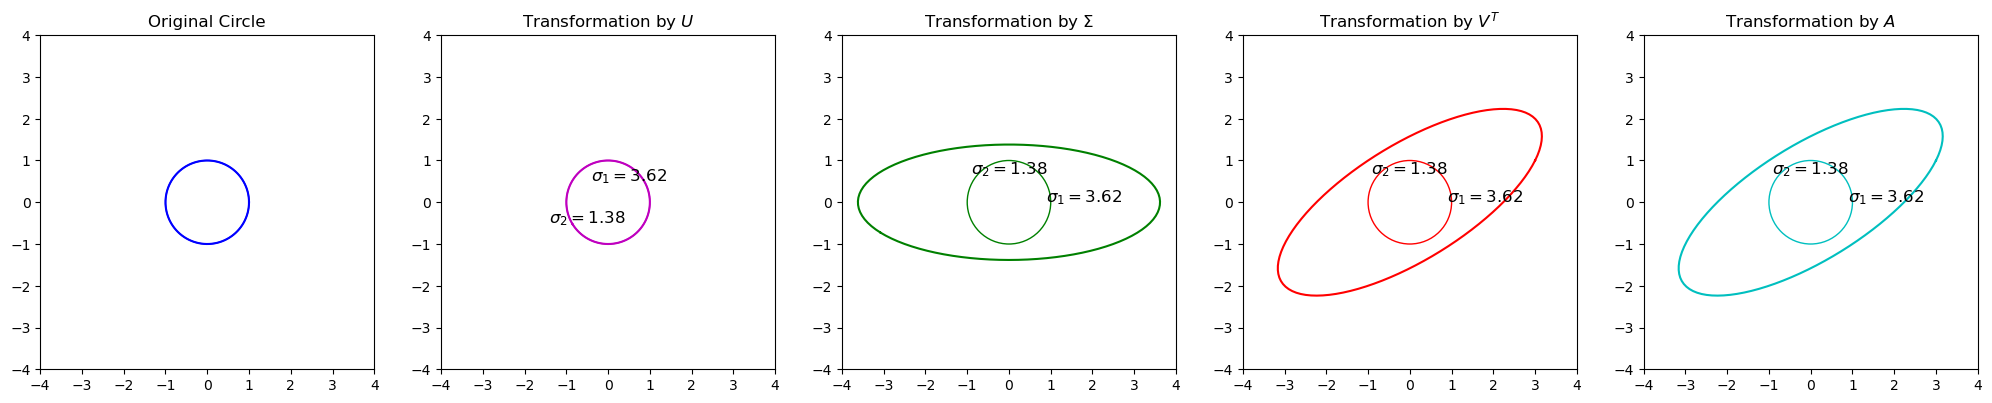

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_circle(ax, center, radius, **kwargs):
    """Plot a circle with a given center and radius."""
    circle = plt.Circle(center, radius, **kwargs)
    ax.add_artist(circle)

# Generate a circle of points
theta = np.linspace(0, 2 * np.pi, 100)
circle = np.vstack((np.cos(theta), np.sin(theta)))

# Define a matrix to be decomposed
A = np.array([[3, 1], [1, 2]])

# Perform SVD
U, Sigma, Vt = np.linalg.svd(A)
Sigma_matrix = np.diag(Sigma)

# Apply transformations
circle_U = U @ circle
circle_SigmaU = Sigma_matrix @ circle_U
circle_SigmaUVt = Vt @ circle_SigmaU
circle_A = A @ circle

# Plotting
fig, ax = plt.subplots(1, 5, figsize=(25, 5))

# Original circle
ax[0].plot(circle[0, :], circle[1, :], 'b')
plot_circle(ax[0], (0, 0), 1, color='b', fill=False)
ax[0].set_xlim(-4, 4)
ax[0].set_ylim(-4, 4)
ax[0].set_aspect('equal', 'box')
ax[0].set_title("Original Circle")

# Transformed by U
ax[1].plot(circle_U[0, :], circle_U[1, :], 'm')
plot_circle(ax[1], (0, 0), 1, color='m', fill=False)
ax[1].set_xlim(-4, 4)
ax[1].set_ylim(-4, 4)
ax[1].set_aspect('equal', 'box')
ax[1].set_title("Transformation by $U$")
ax[1].annotate(f"$\\sigma_1 = {Sigma[0]:.2f}$", (0.5, 0.5), color='black', fontsize=12, ha='center')
ax[1].annotate(f"$\\sigma_2 = {Sigma[1]:.2f}$", (-0.5, -0.5), color='black', fontsize=12, ha='center')

# Transformed by Sigma
ax[2].plot(circle_SigmaU[0, :], circle_SigmaU[1, :], 'g')
plot_circle(ax[2], (0, 0), 1, color='g', fill=False)
ax[2].set_xlim(-4, 4)
ax[2].set_ylim(-4, 4)
ax[2].set_aspect('equal', 'box')
ax[2].set_title("Transformation by $\Sigma$")
ax[2].annotate(f"$\\sigma_1 = {Sigma[0]:.2f}$", (Sigma[0]/2, 0), color='black', fontsize=12, ha='center')
ax[2].annotate(f"$\\sigma_2 = {Sigma[1]:.2f}$", (0, Sigma[1]/2), color='black', fontsize=12, ha='center')

# Transformed by Vt
ax[3].plot(circle_SigmaUVt[0, :], circle_SigmaUVt[1, :], 'r')
plot_circle(ax[3], (0, 0), 1, color='r', fill=False)
ax[3].set_xlim(-4, 4)
ax[3].set_ylim(-4, 4)
ax[3].set_aspect('equal', 'box')
ax[3].set_title("Transformation by $V^T$")
ax[3].annotate(f"$\\sigma_1 = {Sigma[0]:.2f}$", (Sigma[0]/2, 0), color='black', fontsize=12, ha='center')
ax[3].annotate(f"$\\sigma_2 = {Sigma[1]:.2f}$", (0, Sigma[1]/2), color='black', fontsize=12, ha='center')

# Transformation by A directly
ax[4].plot(circle_A[0, :], circle_A[1, :], 'c')
plot_circle(ax[4], (0, 0), 1, color='c', fill=False)
ax[4].set_xlim(-4, 4)
ax[4].set_ylim(-4, 4)
ax[4].set_aspect('equal', 'box')
ax[4].set_title("Transformation by $A$")
ax[4].annotate(f"$\\sigma_1 = {Sigma[0]:.2f}$", (Sigma[0]/2, 0), color='black', fontsize=12, ha='center')
ax[4].annotate(f"$\\sigma_2 = {Sigma[1]:.2f}$", (0, Sigma[1]/2), color='black', fontsize=12, ha='center')

plt.show()


Now, that's beautiful! 

As we can (carefully) see U and $V^T$ rotate the circle and $\Sigma$ stretches it. We get the exact same operation as if we simply multiplied by A!!

***

## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as plt
import os
import pickle 

In [ ]:
"""
import os
import shutil

# Define the base directory
base_dir = r"C:\Users\maorb\Desktop\Work\CSV_OpenFace-folder\CSV_OpenFace - Copy (2)"

# Define the category directories
categories = {
    "boring": os.path.join(base_dir, "boring"),
    "interesting": os.path.join(base_dir, "interesting"),
    "knock": os.path.join(base_dir, "knock"),
    "standup": os.path.join(base_dir, "standup")
}

# Create the category directories if they don't exist
for category in categories.values():
    os.makedirs(category, exist_ok=True)

# Iterate over each file in the base directory
for filename in os.listdir(base_dir):
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(base_dir, filename)
        new_filename = f"Argaman_{filename}"
        new_file_path = os.path.join(base_dir, new_filename)
        os.rename(file_path, new_file_path)
        
        # Split the filename to extract the desired part
        parts = filename.split("_")
        
        # Ensure there are enough parts to extract the word after the third "_"
        if len(parts) > 4:
            category_word = parts[3].lower()  # Get the fourth part and convert to lowercase
            new_filename = f"Argaman_{filename}"
            new_file_path = os.path.join(base_dir, new_filename)
            
           

print("Files have been renamed and sorted.")
"""

In [ ]:
"""
import os
import shutil

# Define the base directory
base_dir = r'C:\Users\maorb\Desktop\Work\CSV_OpenFace-folder\CSV_OpenFace - Copy'

# Define the category directories
categories = {
    "boring": os.path.join(base_dir, "boring"),
    "interesting": os.path.join(base_dir, "interesting"),
    "knock": os.path.join(base_dir, "knock"),
    "standup": os.path.join(base_dir, "standup")
}

# Create the category directories if they don't exist
for category in categories.values():
    os.makedirs(category, exist_ok=True)

# Iterate over each file in the base directory
for filename in os.listdir(base_dir):
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(base_dir, filename)
        
        # Split the filename to extract the desired part
        parts = filename.split("_")
        
        # Ensure there are enough parts to extract the word after the correct underscore
        if len(parts) > 3:
            category_word_3rd = parts[3].lower()  # Get the fourth part (index 3) and convert to lowercase
        if len(parts) > 3:
            category_word_4th = parts[4].lower()  # Get the fifth part (index 4) and convert to lowercase
        
            new_filename = f"Argaman_{filename}"
            new_file_path = os.path.join(base_dir, new_filename)
            
            # Rename the file
            os.rename(file_path, new_file_path)
            
            # Determine the correct category based on the extracted part
            if category_word_3rd in ['knock', 'standup']:
                destination = os.path.join(categories[category_word_3rd], new_filename)
                shutil.move(new_file_path, destination)
            elif category_word_4th in ['boring', 'interesting']:
                destination = os.path.join(categories[category_word_4th], new_filename)
                shutil.move(new_file_path, destination)
            else:
                print(f"Unrecognized category word '{category_word_3rd}' or '{category_word_4th}' in file '{filename}'")

print("Files have been renamed and sorted.")
"""


## Load data from folders

In [ ]:
import os
import pandas as pd

# Define the base directory
base_dir = r'C:\Users\maorb\Classes\Arg_Liron\CSV_OpenFace - Main'

# Our columns of interest
columns = [
    'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 
    'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 
    'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r'
]

# Function to read files and process them
def read_and_process_file(file_path, columns):
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        return None
    
    df.columns = df.columns.str.strip() # Strip whitespace from column names
    return df[columns]

# Recursively get all files that start with "Argaman"
files = []
for root, dirs, filenames in os.walk(base_dir):
    for filename in filenames:
        if filename.startswith("Argaman") and filename.endswith(".csv"):
            files.append(os.path.join(root, filename))

# Read and process all files
dataframes = [read_and_process_file(file, columns) for file in files]

# Drop any None values in case some files were not processed
dataframes1_pre = [df for df in dataframes if df is not None]

# Find the minimum length of all dataframes
min_length = min(len(df) for df in dataframes)

# Trim all dataframes to the minimum length
dataframes1 = [df.iloc[:min_length, :] for df in dataframes]



In [1]:
import os
import pandas as pd

# Define the base directory
base_dir = r'C:\Users\maorb\Classes\Arg_Liron\CSV_OpenFace - Main'

# Our columns of interest
columns = [
    'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 
    'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 
    'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r'
]

# Function to read files and process them
def read_and_process_file(file_path, columns):
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        return None
    
    df.columns = df.columns.str.strip()  # Strip whitespace from column names
    return df[columns] if all(col in df.columns for col in columns) else None  # Ensure all columns exist

# Recursively get all files that match conditions
files_boring = []
files_interesting = []
files_knock = []
files_standup = []

for root, dirs, filenames in os.walk(base_dir):
    for filename in filenames:
        if filename.startswith("Argaman") and "boring" in filename:
            files_boring.append(os.path.join(root, filename))
        elif filename.startswith("Argaman") and "interesting" in filename:
            files_interesting.append(os.path.join(root, filename))
        elif filename.startswith("Argaman") and "knock" in filename:
            files_knock.append(os.path.join(root, filename))
        elif filename.startswith("Argaman") and "standup" in filename:
            files_standup.append(os.path.join(root, filename))

# Read and process all files
dataframes_boring = [read_and_process_file(file, columns) for file in files_boring]
dataframes_interesting = [read_and_process_file(file, columns) for file in files_interesting]
dataframes_knock = [read_and_process_file(file, columns) for file in files_knock]
dataframes_standup = [read_and_process_file(file, columns) for file in files_standup]

# Drop any None values in case some files were not processed
dataframes_boring = [df for df in dataframes_boring if df is not None]
dataframes_interesting = [df for df in dataframes_interesting if df is not None]
dataframes_knock = [df for df in dataframes_knock if df is not None]
dataframes_standup = [df for df in dataframes_standup if df is not None]

# Find the minimum length of all dataframes (across all categories)
min_length = min(
    min(len(df) for df in dataframes_boring),
    min(len(df) for df in dataframes_interesting),
    min(len(df) for df in dataframes_knock),
    min(len(df) for df in dataframes_standup)
)

# Trim all dataframes to the minimum length
dataframes_boring = [df.iloc[:min_length, :] for df in dataframes_boring]
dataframes_interesting = [df.iloc[:min_length, :] for df in dataframes_interesting]
dataframes_knock = [df.iloc[:min_length, :] for df in dataframes_knock]
dataframes_standup = [df.iloc[:min_length, :] for df in dataframes_standup]

# Concatenate all dataframes for each category
df_boring = pd.concat(dataframes_boring, ignore_index=True)
df_interesting = pd.concat(dataframes_interesting, ignore_index=True)
df_knock = pd.concat(dataframes_knock, ignore_index=True)
df_standup = pd.concat(dataframes_standup, ignore_index=True)


In [10]:
dataframes_boring_1 = [df.drop(columns = ['AU02_r','AU05_r']) for df in dataframes_boring]  
dataframes_interesting_1 = [df.drop(columns = ['AU02_r','AU05_r']) for df in dataframes_interesting]
dataframes_knock_1 = [df.drop(columns = ['AU02_r','AU05_r']) for df in dataframes_knock]    
dataframes_standup_1 = [df.drop(columns = ['AU02_r','AU05_r']) for df in dataframes_standup]

In [11]:
from scipy.ndimage import gaussian_filter
filtered_boring = [gaussian_filter(df, sigma=6 / 2.3548) for df in dataframes_boring_1]
filtered_interesting = [gaussian_filter(df, sigma=6 / 2.3548) for df in dataframes_interesting_1]
filtered_knock = [gaussian_filter(df, sigma=6 / 2.3548) for df in dataframes_knock_1]
filtered_standup = [gaussian_filter(df, sigma=6 / 2.3548) for df in dataframes_standup_1]

### Save it using pickle

In [3]:
"""
with open('dataframes1.pickle', 'wb') as f:
    pickle.dump(dataframes1, f)
"""

In [2]:
import pickle
#load dataframes1
with open(r"C:\Users\maorb\Desktop\Work\picklefiles\dataframes1.pickle", 'rb') as f:
    dataframes1 = pickle.load(f)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter
# Initialize the StandardScaler and PCA objects
scaler = StandardScaler()
scaled_dfs = [scaler.fit_transform(df) for df in dataframes1]
filtered_dfs = [gaussian_filter(df, sigma=6 / 2.3548) for df in dataframes1]

## The Sherlock data - The data they used in the article

This dataset is described in the paper:
"Shared memories reveal shared structure in neural activity across individuals"
Janice Chen, Yuan Chang Leong, Christopher J. Honey, Chung H. Yong, Kenneth A. Norman, and Uri Hasson. 
Nature Neuroscience 20, no. 1 (January 2017): 115-25. doi:10.1038/nn.4450

Seventeen subjects watched the first 50 minutes of Episode 1 of BBC's Sherlock. The movie was split into two parts of approximately equal length (946 and 1030 TRs). Immediately afterward (a few minutes to set up the next scan, but no intervening task), subjects described aloud what they recalled from the movie. The movie was segmented into 50 scenes, following major shifts in the narrative (e.g., director's cuts) and each subject's recall/description was segmented into the same scenes (for the scenes that they remembered). 

All data were preprocessed and transformed to 3mm MNI space as described in the paper. Data were zscored across time at every voxel. 6mm smoothing was applied.
Files are cropped so that all movie-viewing data are aligned across subjects, and all recall data are aligned to the scene timestamps below. The cropping includes a constant 3-TR (4.5 sec) shift to correct for hemodynamic lag; no additional shifting should be necessary.

Cite the paper when you use these data.

Additional notes:

- Movie scans 1 and 2 are concatenated into a single file for each subject, "sherlock_movie_s#.nii".
Movie Scan 1: 946 TRs
Movie Scan 2: 1030 TRs
Thus, the sherlock_movie_s#.nii files are 1976 TRs total length.

- Subject 5 has a small amount of missing data at the end of the movie scan, ~1 scene; the data have been padded to make them the same length as the other subjects. This can be seen by plotting the timecourses of voxels -- the padded section is perfectly flat. You may choose to exclude these data from your analyses.

In [145]:
dataframes1[0].iloc[:, 0].shape

(1315,)

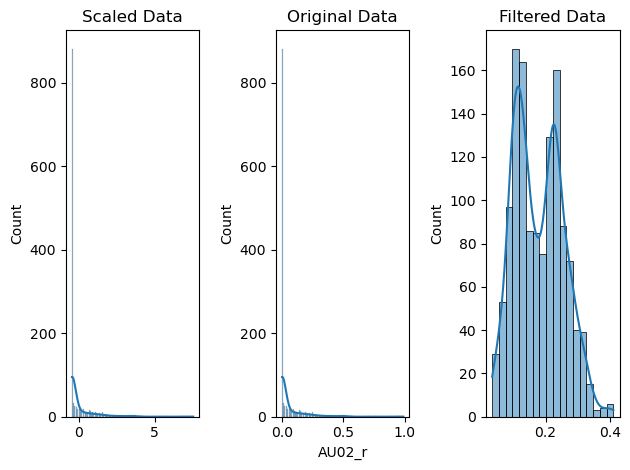

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot(1, 3,1)

sns.histplot(scaled_dfs[0][:, 0], kde=True)
plt.title("Scaled Data")

plt.subplot(1, 3,2)
sns.histplot(dataframes1[0].iloc[:, 0], kde=True)
plt.title("Original Data")

plt.subplot(1, 3,3)
sns.histplot(filtered_dfs[0][:, 0], kde=True)
plt.title("Filtered Data")

plt.tight_layout()

Our data is not Gaussian-like distributed.

In [13]:
dataframes1_1 = [df.drop(columns = ['AU02_r','AU05_r','AU23_r']) for df in dataframes1]

## Reading all the files from my folders:

Note: In our datasets we have 

$$
Rows_{timeframes}\quad X \quad Columns_{muscles}, \\
\text{ or } dxv
$$

<br>

Thus, we're going to transpose the matrix!

In [12]:
dataframes1_trans = [df.T for df in dataframes1]
dataframes1_trans_boring = [df.T for df in dataframes_boring]
dataframes1_trans_interesting = [df.T for df in dataframes_interesting]
dataframes1_trans_standup = [df.T for df in dataframes_standup]
dataframes1_trans_knock = [df.T for df in dataframes_knock]

In [14]:
dataframes1_1_trans = [df.T for df in dataframes1_1]
dataframes1_1_trans_boring = [df.T for df in dataframes_boring_1]
dataframes1_1_trans_interesting = [df.T for df in dataframes_interesting_1]
dataframes1_1_trans_standup = [df.T for df in dataframes_standup_1]
dataframes1_1_trans_knock = [df.T for df in dataframes_knock_1]
dataframes1_1_trans_boring_filtered = [df.T for df in filtered_boring]
dataframes1_1_trans_interesting_filtered = [df.T for df in filtered_interesting]
dataframes1_1_trans_standup_filtered = [df.T for df in filtered_standup]
dataframes1_1_trans_knock_filtered = [df.T for df in filtered_knock]

In [4]:
dataframes1_trans_copy_boring = np.array([df.copy().to_numpy() for df in dataframes1_trans_boring],dtype = np.float64)
dataframes1_trans_copy_interesting = np.array([df.copy().to_numpy() for df in dataframes1_trans_interesting], dtype = np.float64)
dataframes1_trans_copy_standup = np.array([df.copy().to_numpy() for df in dataframes1_trans_standup], dtype = np.float64)
dataframes1_trans_copy_knock = np.array([df.copy().to_numpy() for df in dataframes1_trans_knock], dtype = np.float64)

In [169]:
dataframes1_1_trans_copy_boring = np.array([df.copy().to_numpy() for df in dataframes1_1_trans_boring], dtype = np.float64)
dataframes1_1_trans_copy_interesting = np.array([df.copy().to_numpy() for df in dataframes1_1_trans_interesting], dtype = np.float64)
dataframes1_1_trans_copy_standup = np.array([df.copy().to_numpy() for df in dataframes1_1_trans_standup], dtype = np.float64) 
dataframes1_1_trans_copy_knock = np.array([df.copy().to_numpy() for df in dataframes1_1_trans_knock], dtype = np.float64)
dataframes1_1_trans_copy_boring_filtered = np.array([df.copy() for df in dataframes1_1_trans_boring_filtered], dtype = np.float64)
dataframes1_1_trans_copy_interesting_filtered = np.array([df.copy() for df in dataframes1_1_trans_interesting_filtered], dtype = np.float64)
dataframes1_1_trans_copy_standup_filtered = np.array([df.copy() for df in dataframes1_1_trans_standup_filtered], dtype = np.float64)
dataframes1_1_trans_copy_knock_filtered = np.array([df.copy() for df in dataframes1_1_trans_knock_filtered], dtype = np.float64)

In [5]:
dataframes1_trans_copy = np.array([df.copy().to_numpy() for df in dataframes1_trans],dtype = np.float64)

## EDA

### The zero factor

In [14]:
def zeros_counts(dataframes1):

    zeros_list = {'Dataframe': [], 'Most_zeros_col': [], 'Number_of_zeros': []}
    for j,i in enumerate(dataframes1):
        zeros_list['Dataframe'].append(j)
        zeros_list['Most_zeros_col'].append(i[i==0].count(axis = 0).idxmax())
        zeros_list['Number_of_zeros'].append(i[i==0].count(axis = 0).max())

    zeros_across_dataframes = np.zeros((len(dataframes1),len(dataframes1[0].columns)))
    for i in range(len(dataframes1)):
        zeros_across_dataframes[i] = dataframes1[i][dataframes1[i]==0].count(axis = 0)/len(dataframes1[i])
    
    return zeros_list, zeros_across_dataframes

In [15]:
zeros_list, zeros_across_dataframes = zeros_counts(dataframes1)

In [82]:
pd.DataFrame(np.mean(zeros_across_dataframes, axis = 0), index = dataframes1[0].columns, columns = ['Mean_zeros'])

,Mean_zeros
AU02_r,0.696426
AU04_r,0.327212
AU05_r,0.742478
AU06_r,0.452909
AU07_r,0.437142
AU09_r,0.653181
AU10_r,0.430640
AU12_r,0.348523
AU14_r,0.247180
AU15_r,0.481077


In [12]:
pd.DataFrame(zeros_across_dataframes, columns = dataframes1[0].columns)

,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,0.669962,0.400000,0.751331,0.041065,0.015209,0.708745,0.000000,0.041065,0.206084,0.498099,0.166540,0.580228,0.569582,0.172624,0.231179,0.496578
1,0.782510,0.359696,0.750570,0.000000,0.012167,0.629658,0.029658,0.000000,0.015209,0.603042,0.067681,0.584791,0.535361,0.191635,0.259316,0.508745
2,0.658555,0.453232,0.721673,0.013688,0.011407,0.637262,0.029658,0.063118,0.099620,0.446388,0.129278,0.640304,0.660837,0.225856,0.170342,0.506464
3,0.679087,0.447909,0.736882,0.373384,0.035741,0.624335,0.022814,0.412928,0.167300,0.463878,0.154373,0.611407,0.640304,0.230418,0.212167,0.514829
4,0.668441,0.675285,0.799240,0.000760,0.001521,0.687452,0.000000,0.000000,0.586312,0.471483,0.164259,0.593916,0.607605,0.189354,0.203042,0.520913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.660837,0.862357,0.748289,0.000000,0.220532,0.649430,0.526236,0.000000,0.000000,0.444106,0.158935,0.636502,0.601521,0.286692,0.232700,0.520913
116,0.660076,0.000000,0.692776,0.003802,0.028897,0.660076,0.291255,0.011407,0.012928,0.511787,0.162738,0.673764,0.557414,0.304943,0.171863,0.496578
117,0.700380,0.000000,0.768821,0.003042,0.054753,0.730798,0.001521,0.015209,0.000000,0.560456,0.111787,0.482890,0.444867,0.409886,0.263878,0.470722
118,0.654753,0.022053,0.763498,0.011407,0.026616,0.688973,0.127757,0.010646,0.022814,0.531559,0.104183,0.537643,0.577947,0.298859,0.277567,0.573384


In [9]:
mostzeros_df = pd.DataFrame(zeros_list)
mostzeros_df


,Dataframe,Most_zeros_col,Number_of_zeros
0,0,AU05_r,988
1,1,AU02_r,1029
2,2,AU05_r,949
3,3,AU05_r,969
4,4,AU05_r,1051
...,...,...,...
115,115,AU04_r,1134
116,116,AU05_r,911
117,117,AU05_r,1011
118,118,AU05_r,1004


In [ ]:
### Amount of zeros in each s0ubset of dataframes
zero_prop_boring = dataframes1_trans_copy_boring[dataframes1_trans_copy_boring == 0].size/dataframes1_trans_copy_boring.size
zero_prop_interest = dataframes1_trans_copy_interesting[dataframes1_trans_copy_interesting == 0].size/dataframes1_trans_copy_interesting.size 
zero_prop_stand = dataframes1_trans_copy_standup[dataframes1_trans_copy_standup == 0].size/dataframes1_trans_copy_standup.size
zero_prop_knock = dataframes1_trans_copy_knock[dataframes1_trans_copy_knock == 0].size/dataframes1_trans_copy_knock.size

In [18]:
zero_prop_df = pd.DataFrame({'Boring': zero_prop_boring, 'Interesting': zero_prop_interest, 'Standup': zero_prop_stand, 'Knock': zero_prop_knock}, index = ['Proportion of zeros'])

In [19]:
zero_prop_df

,Boring,Interesting,Standup,Knock
Proportion of zeros,0.473809,0.466459,0.425604,0.426031


*tried replacing 0 with small values (normal pertubation), but it didn't change the outcome*

In [171]:
"""
# replace 0 with pertubation
#only positive values in pertubation vec:
Pertubation_vec = np.random.normal(0, 0.00001, len(dataframes1_trans_copy))
for j,i in enumerate(dataframes1_trans_copy):
    i.loc[:, :] = i + abs(Pertubation_vec[j])
"""

We're going to use **Gradient Descent** to find the optimal weights for our model.

First, let's implement different batch sizes for the **Stochastic Gradient Descent**. Basically SGD is a variation of GD that divides the dataset into small batches and updates the weights after each period of time, for all subjects.

This way, we use less memory and the algorithm converges faster. The algorithm achieves it by updating the weights and S more frequently.

***

### *Numba JIT*

Quick detour:
Before we perform the code, let's elaborate on numba jit:

Based on the documentation at https://numba.pydata.org/numba-doc/latest/user/jit.html:

"Numba provides several utilities for code generation, but its central feature is the numba.jit() decorator. Using this decorator, you can mark a function for optimization by Numba’s JIT compiler. Various invocation modes trigger differing compilation options and behaviours."

Morover, it's stated that nopython=True "produces much faster code, but has limitations that can force Numba to fall back to the latter. To prevent Numba from falling back, and instead raise an error, pass nopython=True." njit is an alias for @jit(nopython=True).

Overall, numba jit is a wrapper that compiles the code to machine code, more like a C code, which makes it faster.

TLDR, it makes this code wayyy faster.

***

## **GD Algorithms**

### SGD

### No jit- Bad performance

In [67]:
import numpy as np
import numba
from numba import njit


def SRM_SGD(Data, m, k, max_iter=100, tol=1e-4, learning_rate=0.0001):
    """
    Shared Response Model using Stochastic Gradient Descent (SGD) method.

    Parameters:
    - Data: list of NumPy arrays, each of shape (d, n), data for each subject.
    - m: int, number of subjects.
    - k: int, desired dimension of shared response.
    - max_iter: int, maximum number of iterations.
    - tol: float, convergence tolerance.
    - learning_rate: float, learning rate for gradient updates.

    Returns:
    - S: NumPy array of shape (k, n), the shared response matrix.
    - W: list of NumPy arrays, each of shape (d, k), projection matrices for each subject.
    """

    d, n = Data[0].shape
    #print('past1')

    # Initialize W_i for each subject randomly
    W = []
    for i in range(m):
        W_i = np.random.randn(d, k)
        W.append(W_i)
    #print('past2')

    # Initialize S randomly
    S = np.random.randn(k, n)

    # SGD Algorithm
    for iteration in range(max_iter):
        print('past3')
        S_old = S.copy()

        total_reconstruction_error = 0

        # Update W_i for each subject
        for i in range(m):
            # Compute gradient with respect to W_i
            gradient_Wi = -2 * (Data[i] - W[i] @ S) @ S.T
            # Update W_i
            W[i] -= learning_rate * gradient_Wi

            # Calculate reconstruction error for subject i
            reconstruction_error = np.linalg.norm(Data[i] - W[i] @ S, 'fro') ** 2
            total_reconstruction_error += reconstruction_error

        # Update S
        gradient_S = -2 * sum([W[i].T @ (Data[i] - W[i] @ S) for i in range(m)])
        S -= learning_rate * gradient_S

        # Calculate mean reconstruction error across subjects
        mean_reconstruction_error = total_reconstruction_error / m

        # Check convergence
        delta_S = np.linalg.norm(S - S_old, 'fro') / np.linalg.norm(S_old, 'fro')
        #print without f string
        print("Iteration", iteration, "Delta S:", delta_S, "Mean Reconstruction Error:", mean_reconstruction_error)

        if delta_S < tol or mean_reconstruction_error < tol:
            print("Converged.")
            break

    return S, W


***

### SGD - With jit

### Batch size >1

In [148]:
import numpy as np
from numba import njit

@njit
def SRM_SGD_numba_SGD(Data, k, batch_size, max_epochs=100000, tol=1e-4, learning_rate=0.0001):
    """
    Shared Response Model using Stochastic Gradient Descent (SGD) with mini-batches.
    """
    m, d, n = Data.shape  # m subjects, d features, n samples

    # Initialize W randomly for each subject
    W = np.random.rand(m, d, k)
    S = np.random.rand(k, n)
    reconstruction_error_list = []
    delta_S_list = []
    delta_mean_W = []

    for epoch in range(max_epochs):
        S_old = S.copy()
        total_reconstruction_error = 0.0
        sum_delta_W = 0.0
        count_delta_W = 0.0

        # Shuffle sample indices
        sample_indices = np.arange(n)
        np.random.shuffle(sample_indices)
        

        # Process each batch
        for batch_start in range(0, n, batch_size):
            batch_indices = sample_indices[batch_start : batch_start + batch_size]
            batch_size_actual = len(batch_indices)  # May be less than batch_size at the end

            # Create S_batch and Data_i_batch manually
            S_batch = S[:, batch_indices].copy()  # Shape: (k, batch_size_actual)
            gradient_S_batch = np.zeros((k, batch_size_actual))

            for i in range(m):
                # Manually create a contiguous batch of data
                Data_i_batch = np.zeros((d, batch_size_actual))
                for j in range(batch_size_actual):
                    Data_i_batch[:, j] = Data[i, :, batch_indices[j]]

                # Compute W[i] @ S_batch
                WS = np.dot(W[i], S_batch)  # Shape: (d, batch_size_actual)

                # Compute the error
                error = Data_i_batch - WS  # Shape: (d, batch_size_actual)

                # Compute gradient with respect to W_i
                gradient_Wi = -2.0 * np.dot(error, S_batch.T) / batch_size_actual  # Shape: (d, k)

                W_old = W[i].copy()
                
                # Update W_i
                W[i] -= learning_rate * gradient_Wi
                

                norm_W_diff = np.sqrt(np.sum((W[i] - W_old) ** 2))
                norm_W_old = np.sqrt(np.sum(W_old ** 2))
                delta_W = norm_W_diff / (norm_W_old + 1e-12)
                sum_delta_W += delta_W
                count_delta_W += 1

                # Accumulate gradient for S_batch
                gradient_S_batch += -2.0 * np.dot(W[i].T, error)  # Shape: (k, batch_size_actual)

                # Accumulate reconstruction error
                reconstruction_error = np.sum(error ** 2)
                total_reconstruction_error += reconstruction_error

            # Update S_batch after all subjects have been processed
            S_batch -= learning_rate * gradient_S_batch / m  # Average gradient over subjects

            # Update the shared response matrix
            S[:, batch_indices] = S_batch

        # Calculate mean reconstruction error across all samples and subjects
        mean_reconstruction_error = total_reconstruction_error / (m * n)
        print('past')
        mean_w = sum_delta_W / count_delta_W
        delta_mean_W.append(mean_w)
        # Compute Frobenius norm of (S - S_old)
        norm_diff = np.sqrt(np.sum((S - S_old) ** 2))
        norm_S_old = np.sqrt(np.sum(S_old ** 2))
        delta_S = norm_diff / (norm_S_old + 1e-12)
        delta_S_list.append(delta_S)
        reconstruction_error_list.append(mean_reconstruction_error)

        print("Epoch", epoch, "Delta S:", delta_S, 'Delta W:', mean_w, "Mean Reconstruction Error:", mean_reconstruction_error)

        # Check convergence
        if mean_reconstruction_error < tol or mean_w < tol:
            print("Converged.")
            break

    return S, W, reconstruction_error_list, delta_S_list, delta_mean_W


*Added here delta W*

In [ ]:
k = 16
batch_size = 50

S_5_te, W_5_te, reconstruction_error_list_5_te, delta_S_list_5_te,delta_mean_W_te = SRM_SGD_numba_SGD(dataframes1_trans_copy, k, batch_size,
                                                                                                       max_epochs=400, tol=1e-4, learning_rate=0.0001)

In [ ]:
k = 16
batch_size = 50
max_epochs = 1000

S_5, W_5, reconstruction_error_list_5, delta_S_list_5 = SRM_SGD_numba_SGD(dataframes1_trans_copy, k, batch_size)

***

### SGD t = 1 (Batch size = 1)

In [4]:
import numpy as np
from numba import njit

@njit
def SRM_SGD_numba_SGD(Data, k, max_epochs=1000, tol=1e-4, learning_rate=0.0001):
    """
    Shared Response Model using Stochastic Gradient Descent (SGD).
    """
    m, d, n = Data.shape  # Number of features per subject

    # Initialize W randomly for each subject
    W = np.random.rand(m, d, k)
    S = np.random.rand(k, n)
    reconstruction_error_list = []
    delta_S_list = []
    Delta_W_list = []

    for epoch in range(max_epochs):
        S_old = S.copy()
        total_reconstruction_error = 0.0
        sum_delta_W = 0.0
        count_delta_W = 0.0

        # Shuffle sample indices
        sample_indices = np.arange(n)
        np.random.shuffle(sample_indices)

        # Process each sample individually
        for t in sample_indices:
            # Extract the shared response at time t
            S_t = S[:, t]  # Shape: (k,)

            # Update W_i for each subject
            for i in range(m):
                # Extract data for subject i at time t
                Data_i_t = Data[i, :, t].copy()  # Shape: (d,)


                # Compute W[i] @ S_t
                WS = np.dot(W[i], S_t)  # Shape: (d,)

                # Compute the error
                error = Data_i_t - WS  # Shape: (d,)

                # Compute gradient with respect to W_i
                gradient_Wi = -2.0 * np.outer(error, S_t)  # Shape: (d, k)

                W_old = W[i].copy()

                # Update W_i
                W[i] -= learning_rate * gradient_Wi
                norm_W_diff = np.sqrt(np.sum((W[i] - W_old) ** 2))
                norm_W_old = np.sqrt(np.sum(W_old ** 2))
                delta_W = norm_W_diff / (norm_W_old + 1e-12)
                sum_delta_W += delta_W
                count_delta_W += 1
                

                # Update S_t
                gradient_S_t = -2.0 * np.dot(W[i].T, error)  # Shape: (k,)
                S_t -= learning_rate * gradient_S_t

                # Update the shared response matrix
                S[:, t] = S_t

                # Accumulate reconstruction error
                reconstruction_error = np.sum(error ** 2)
                total_reconstruction_error += reconstruction_error

        # Calculate mean reconstruction error across all samples and subjects
        mean_reconstruction_error = total_reconstruction_error / (m * n)

        # Compute Frobenius norm of (S - S_old)
        mean_W = sum_delta_W / count_delta_W
        Delta_W_list.append(mean_W)
        norm_diff = np.sqrt(np.sum((S - S_old) ** 2))
        norm_S_old = np.sqrt(np.sum(S_old ** 2))
        delta_S = norm_diff / (norm_S_old + 1e-12)
        delta_S_list.append(delta_S)
        reconstruction_error_list.append(mean_reconstruction_error)

        print("Epoch", epoch, "Delta S:", delta_S, 'Delta W:', mean_W, "Mean Reconstruction Error:", mean_reconstruction_error)

        # Check convergence
        if mean_reconstruction_error < tol or mean_W < tol:
            print("Converged.")
            break

    return S, W, reconstruction_error_list, delta_S_list


In [ ]:
k = 16

S_5_te, W_5_te, reconstruction_error_list_5_te, delta_S_list_5_te,delta_mean_W_te = SRM_SGD_numba_SGD(dataframes1_trans_copy, k,
                                                                                                       max_epochs=400, tol=1e-4, learning_rate=0.0001)

In [ ]:
k = 16

S, W, reconstruction_error_list, delta_S_list = SRM_SGD_numba_SGD(dataframes1_trans_copy, k)

Gradient Descent with full data each iteration. This model is slower but we got convergence in the delta S with monotonic decrease in the loss function.

***

## **GD**

In [194]:
import numpy as np
from numba import njit

@njit
def SRM_SGD_numba(Data, m, k, n, max_iter=100, tol=1e-4, learning_rate=0.0001):
    """
    Shared Response Model using Stochastic Gradient Descent (SGD) method optimized for Numba.
    """
    d = Data.shape[1]  # Number of features per subject

    # Initialize W randomly for each subject
    W = np.random.rand(m, d, k)
    S = np.random.rand(k, n)
    reconstruction_error_list = []
    delta_S_list = []
    delta_W_list = []

    for iteration in range(max_iter):
        S_old = S.copy()
        total_reconstruction_error = 0.0
        sum_delta_W = 0.0   

        # Update W_i for each subject
        for i in range(m):
            # Compute W[i] @ S
            WS = np.dot(W[i], S)  # Shape: (d, n)

            # Compute Data[i] - W[i] @ S
            D_minus_WS = Data[i] - WS  # Shape: (d, n)

            # Compute gradient with respect to W_i
            gradient_Wi = -2.0 * np.dot(D_minus_WS, S.T)  # Shape: (d, k)

            W_old = W[i].copy()

            # Update W_i
            W[i] -= learning_rate * gradient_Wi
            norm_W_diff = np.sqrt(np.sum((W[i] - W_old) ** 2))
            norm_W_old = np.sqrt(np.sum(W_old ** 2))
            delta_W = norm_W_diff / (norm_W_old + 1e-12)
            sum_delta_W += delta_W

            # Calculate reconstruction error for subject i
            reconstruction_error = np.sum(D_minus_WS ** 2)
            total_reconstruction_error += reconstruction_error

        # Update S
        grad_S = np.zeros((k, n))
        for i in range(m):
            D_minus_WS = Data[i] - np.dot(W[i], S)  # Shape: (d, n)
            grad_S += -2.0 * np.dot(W[i].T, D_minus_WS)  # Shape: (k, n)
        S -= learning_rate * grad_S

        # Calculate mean reconstruction error across subjects
        mean_reconstruction_error = total_reconstruction_error / m

        # Compute Frobenius norm of (S - S_old)
        norm_diff = np.sqrt(np.sum((S - S_old) ** 2))
        norm_S_old = np.sqrt(np.sum(S_old ** 2))
        delta_S = norm_diff / (norm_S_old + 1e-12)
        delta_S_list.append(delta_S)
        mean_W = sum_delta_W / m
        delta_W_list.append(mean_W)
        reconstruction_error_list.append(mean_reconstruction_error)
        #delta_S = np.linalg.norm(S - S_old, 'fro') / (np.linalg.norm(S_old, 'fro') + 1e-12)

        print("Iter", iteration, "Delta S:", delta_S, 'delta W:', delta_W, "Mean Reconstruction Error:", mean_reconstruction_error)

        # Check convergence
        if mean_reconstruction_error < tol or mean_W < tol:
            print("Converged.")
            break

    return S, W, reconstruction_error_list, delta_S_list, delta_W_list  


*added here delta W*

In [ ]:
# Parameters
m = 120        # Number of subjects
k = 16           # Desired dimension of shared response
max_iter = 2000
tol = 1e-4
learning_rate = 0.0001
n = 1315
#W = np.random.rand(m, n, k)
#S = np.random.rand(k, n)
S_te, W_te, reconstruction_error_list_te, delta_S_list_te,delta_W_list =  SRM_SGD_numba(dataframes1_trans_copy, m, k, n, max_iter, tol=1e-4, learning_rate=0.0001)

In [196]:
with open(r"C:\Users\maorb\Desktop\Work\picklefiles\delta_W.pkl", 'wb') as f:
    pickle.dump(delta_W_list, f)

In [ ]:
# Parameters
m = 120        # Number of subjects
k = 16           # Desired dimension of shared response
max_iter = 100000
tol = 1e-4
learning_rate = 0.0001
n = 1315
#W = np.random.rand(m, n, k)
#S = np.random.rand(k, n)
S, W, reconstruction_error_list, delta_S_list=  SRM_SGD_numba(dataframes1_trans_copy, m, k, n, max_iter=100000, tol=1e-4, learning_rate=0.0001)

In [53]:
with open (r"C:\Users\maorb\Desktop\Work\picklefiles\reconstruction_error_list.pkl", 'rb') as f:
    reconstruction_error_list = pickle.load(f)

Text(0.5, 1.0, 'Reconstruction Error')

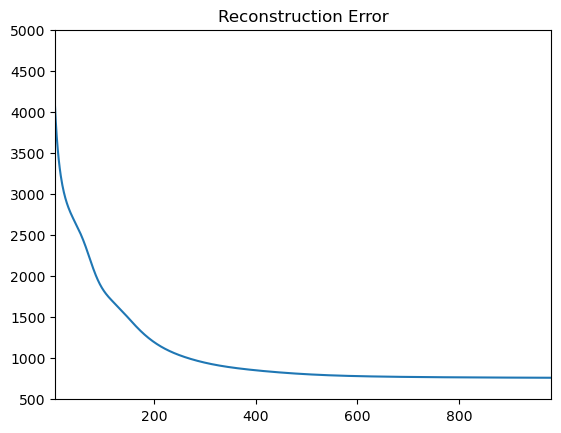

In [54]:
g = sns.lineplot(reconstruction_error_list)  
g.set(xlim=(5, len(reconstruction_error_list)), ylim=(500, 5000))
plt.title('Reconstruction Error')

In [56]:
with open (r"C:\Users\maorb\Desktop\Work\picklefiles\delta_S_list.pkl", 'rb') as f:
    delta_S_list = pickle.load(f)

[(3.0, 14.0), (0.0, 10.0)]

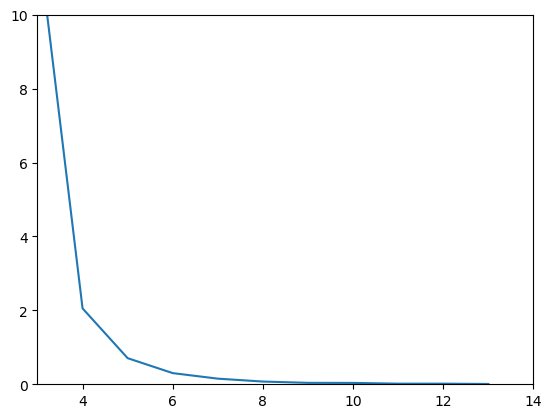

In [64]:
g1 = sns.lineplot(delta_S_list) 
g1.set(xlim=(3, len(delta_S_list)), ylim=(0, 10))
plt.title('Delta S')

***

### Pickle imports

In [197]:
with open (r"C:\Users\maorb\Desktop\Work\picklefiles\reconstruction_error_list.pkl", 'rb') as f:
    reconstruction_error_list = pickle.load(f)

with open (r"C:\Users\maorb\Desktop\Work\picklefiles\delta_S_list.pkl", 'rb') as f:
    delta_S_list = pickle.load(f)

with open (r"C:\Users\maorb\Desktop\Work\picklefiles\W.pkl", 'rb') as f:
    W = pickle.load(f)

with open (r"C:\Users\maorb\Desktop\Work\picklefiles\S.pkl", 'rb') as f:
    S = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\W_1.pkl", 'rb') as f:
    W_1 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\S_1.pkl", 'rb') as f:
    S_1 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\reconstruction_error_list_1.pkl", 'rb') as f:
    reconstruction_error_list_1 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\delta_S_list_1.pkl", 'rb') as f:
    delta_S_list_1 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\W_5.pickle", 'rb') as f:
    W_5 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\S_5.pkl", 'rb') as f:
    S_5 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\reconstruction_error_list_5.pickle", 'rb') as f:
    reconstruction_error_list_5 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\delta_S_list_5.pickle", 'rb') as f:
    delta_S_list_5 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\W_50.pickle", 'rb') as f:
    W_50 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\S_50.pickle", 'rb') as f:
    S_50 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\reconstruction_error_list_50.pickle", 'rb') as f:
    reconstruction_error_list_50 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\delta_S_list_50.pickle", 'rb') as f:
    delta_S_list_50 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\delta_mean_W_50.pkl", 'rb') as f:
    delta_mean_W_50 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\delta_W.pkl", 'rb') as f:
    delta_mean_W = pickle.load(f)



***

### Reconstruction Error

[Text(0.5, 1.0, 'Reconstruction Error SGD batch size 50'), (0.0, 10.0)]

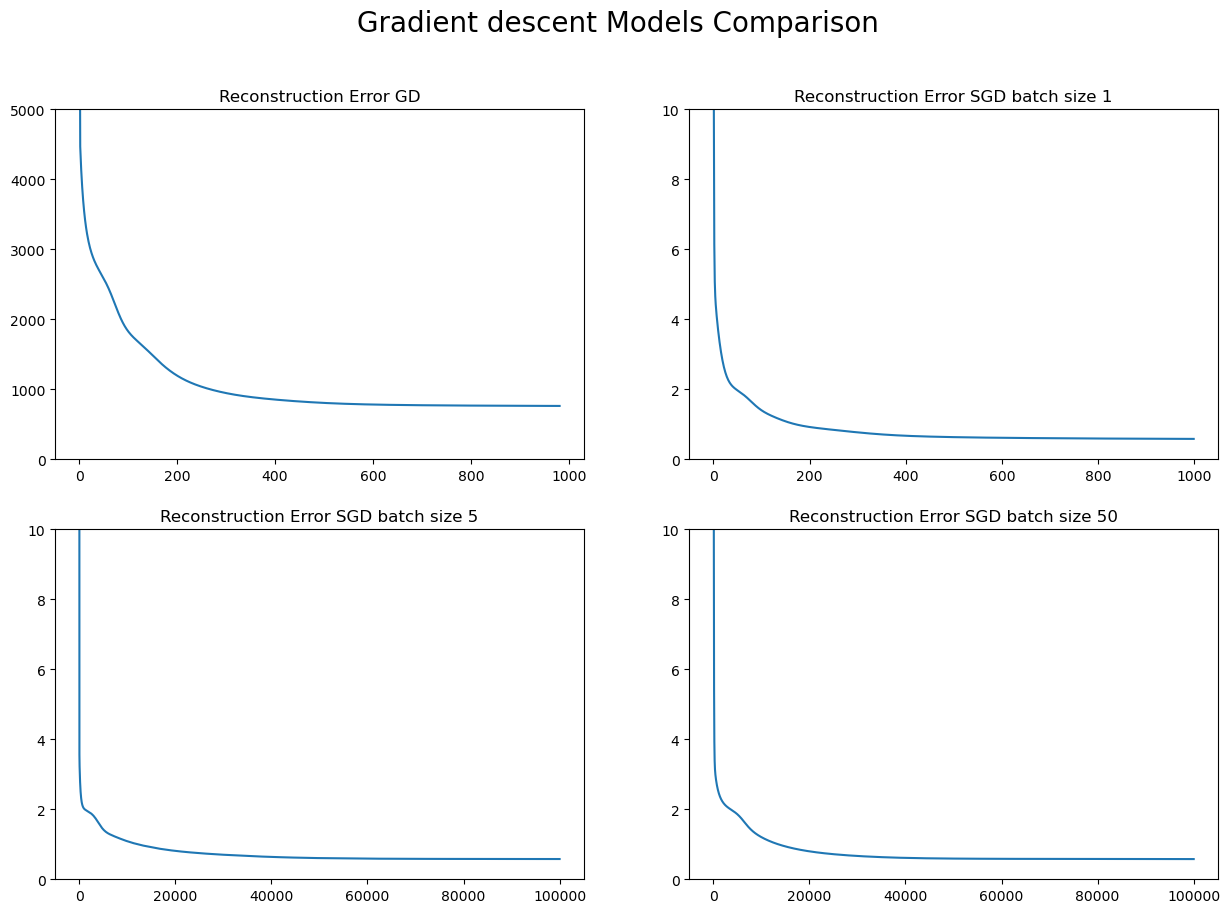

In [78]:
#Let's plot the reconstruction error and delta S for each model:

fig = plt.figure(figsize=(15, 10))
fig.suptitle('Gradient descent Models Comparison', fontsize=20)
plt.subplot(2, 2, 1)
g = sns.lineplot(reconstruction_error_list)
g.set(title='Reconstruction Error GD',ylim=(0, 5000))

plt.subplot(2, 2, 2)
g1 = sns.lineplot(reconstruction_error_list_1)
g1.set(title='Reconstruction Error SGD batch size 1',ylim=(0, 10))

plt.subplot(2, 2, 3)
g2 = sns.lineplot(reconstruction_error_list_5)
g2.set(title='Reconstruction Error SGD batch size 5',ylim=(0, 10))

plt.subplot(2, 2, 4)
g3 = sns.lineplot(reconstruction_error_list_50)
g3.set(title='Reconstruction Error SGD batch size 50',ylim=(0, 10))

We can see a **monotonic decrease** in the loss function. in the SGD the reconstruction error is lower.

***

### Delta S

[Text(0.5, 1.0, 'Delta S list SGD batch size 50'), (0.0, 0.002)]

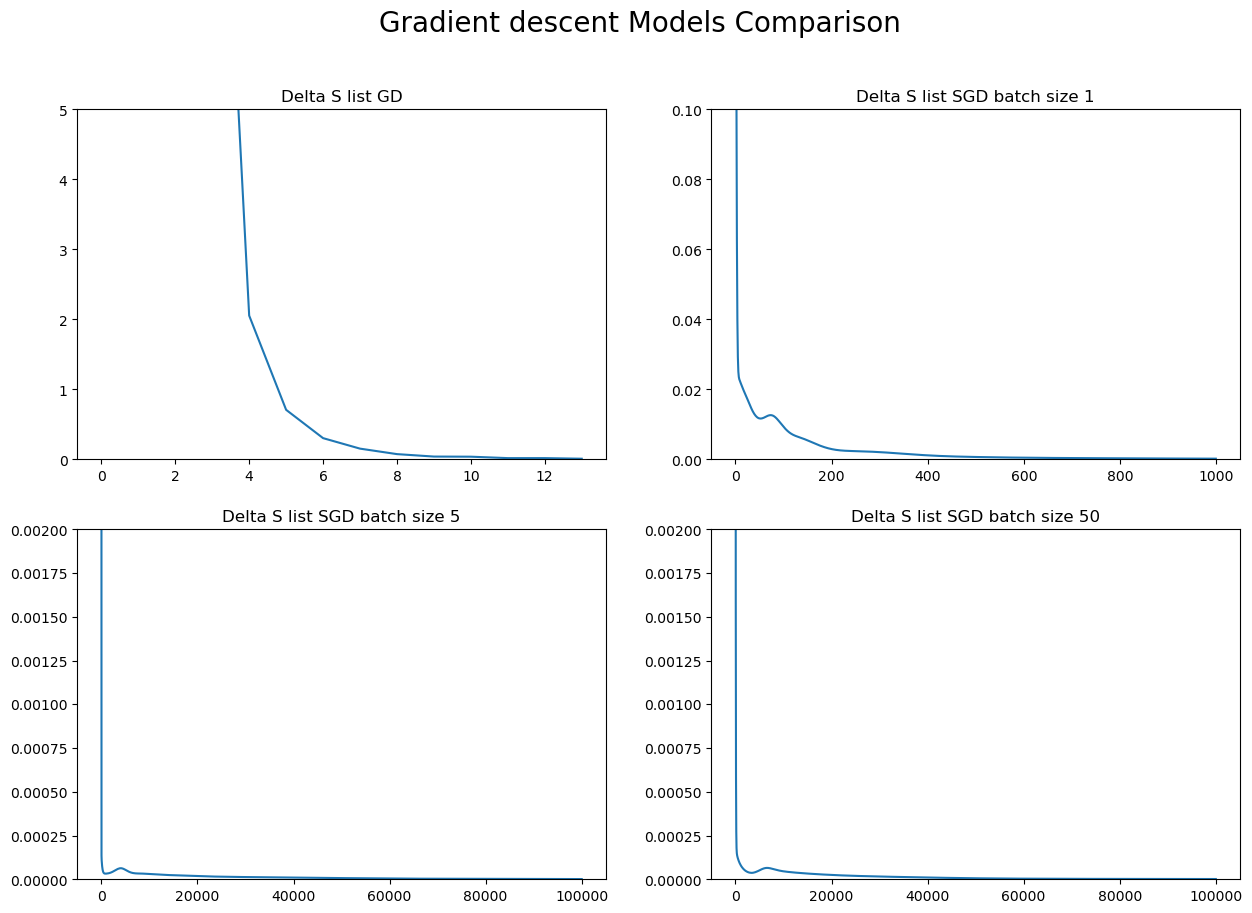

In [160]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Gradient descent Models Comparison', fontsize=20)
plt.subplot(2, 2, 1)
g = sns.lineplot(delta_S_list)
g.set(title='Delta S list GD',ylim=(0, 5))

plt.subplot(2, 2, 2)
g1 = sns.lineplot(delta_S_list_1)
g1.set(title='Delta S list SGD batch size 1',ylim=(0, 0.1))

plt.subplot(2, 2, 3)
g2 = sns.lineplot(delta_S_list_5)
g2.set(title= 'Delta S list SGD batch size 5',ylim=(0, .002))

plt.subplot(2, 2, 4)
g3 = sns.lineplot(delta_S_list_50)
g3.set(title='Delta S list SGD batch size 50',ylim=(0, .002))

We can see a **monotonic decrease** in the loss function. in the SGD the delta S is lower.

### Delta W

[Text(0.5, 1.0, 'Delta W SGD with batch size 50'), (0.0, 0.01)]

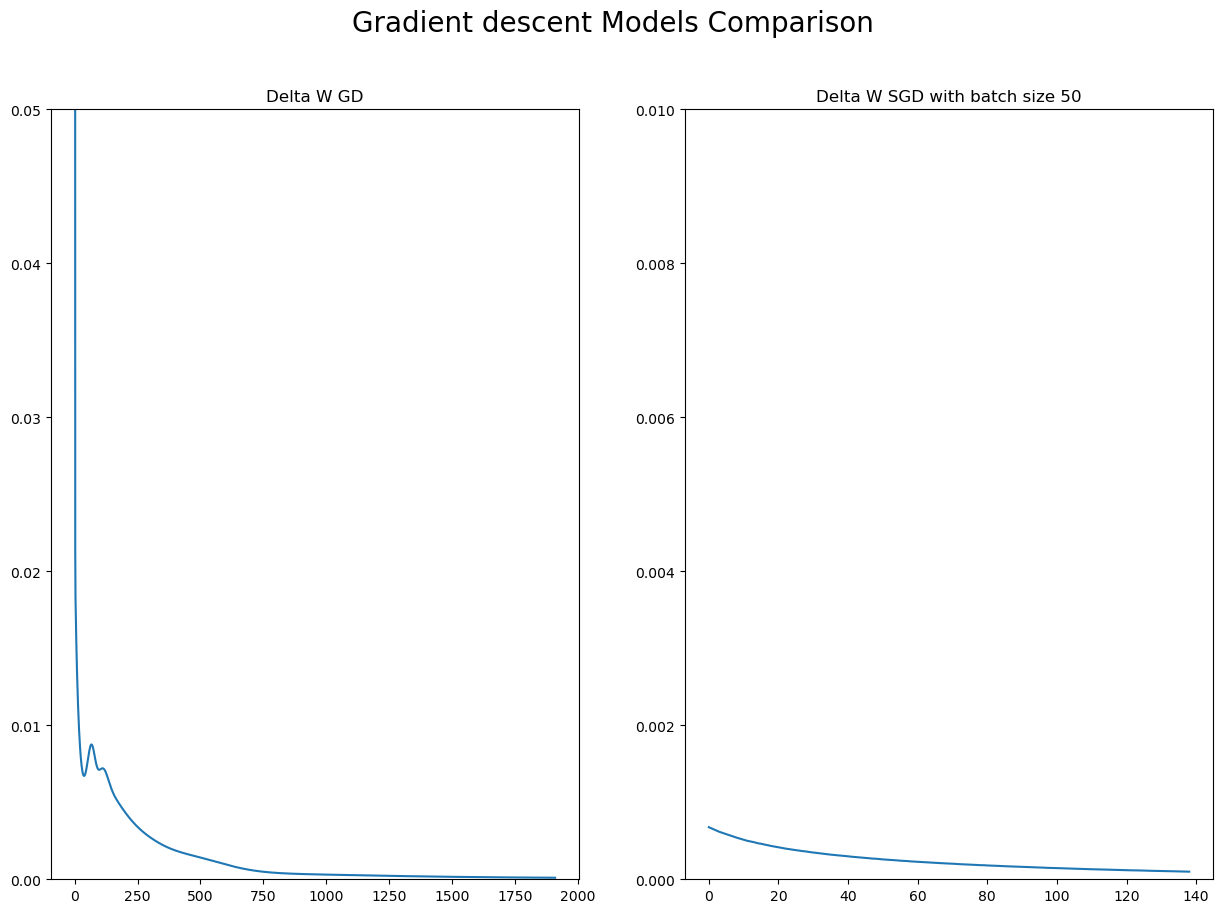

In [198]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Gradient descent Models Comparison', fontsize=20)
plt.subplot(1, 2, 1)

g1 = sns.lineplot(delta_mean_W)
g1.set(title='Delta W GD',ylim=(0, .05))

plt.subplot(1, 2, 2)
g = sns.lineplot(delta_mean_W_50)
g.set(title='Delta W SGD with batch size 50',ylim=(0, .01))

*Added delta W, same overall trend as delta S, converges*

We can see a **monotonic decrease** in the loss function. in the SGD the delta W is lower.

***

## **Correlation matrix**

In [69]:
W_flattened = [W[i].flatten() for i in range(len(W))]

In [10]:
data_frames_flattened = [df.flatten() for df in dataframes1_trans_copy]
data_frames_boring_flattened = [df.flatten() for df in dataframes1_trans_copy_boring]
data_frames_interesting_flattened = [df.flatten() for df in dataframes1_trans_copy_interesting]
data_frames_standup_flattened = [df.flatten() for df in dataframes1_trans_copy_standup]
data_frames_knock_flattened = [df.flatten() for df in dataframes1_trans_copy_knock]

### Correlation between the weights for the standard GD

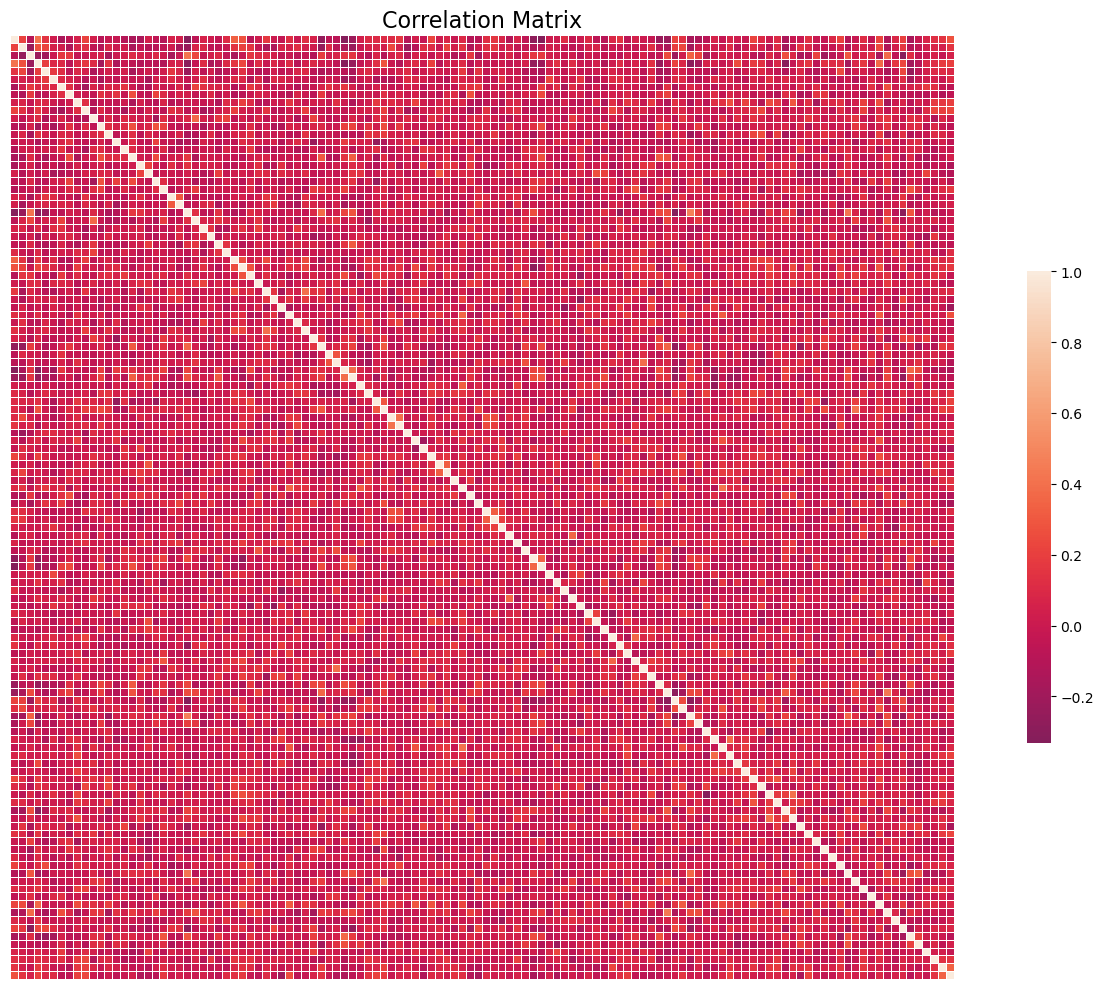

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Data Preparation -----
# Assuming data_frames_flattened is already defined and is a list of NumPy arrays or can be converted to one
X = np.array(W_flattened)  # Shape: (n_samples, n_features)

# ----- Step 2: Compute Correlation Matrix -----
# Set rowvar=False since each column represents a feature
corr_matrix = np.corrcoef(X)

# Initialize the matplotlib figure with the desired size
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(
    corr_matrix, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix", fontsize=16)

# Adjust layout to make room for the title and ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


### Correlation between the weights for the SGD with batch size 1

In [73]:
W_1_flattened = [W_1[i].flatten() for i in range(len(W_1))]

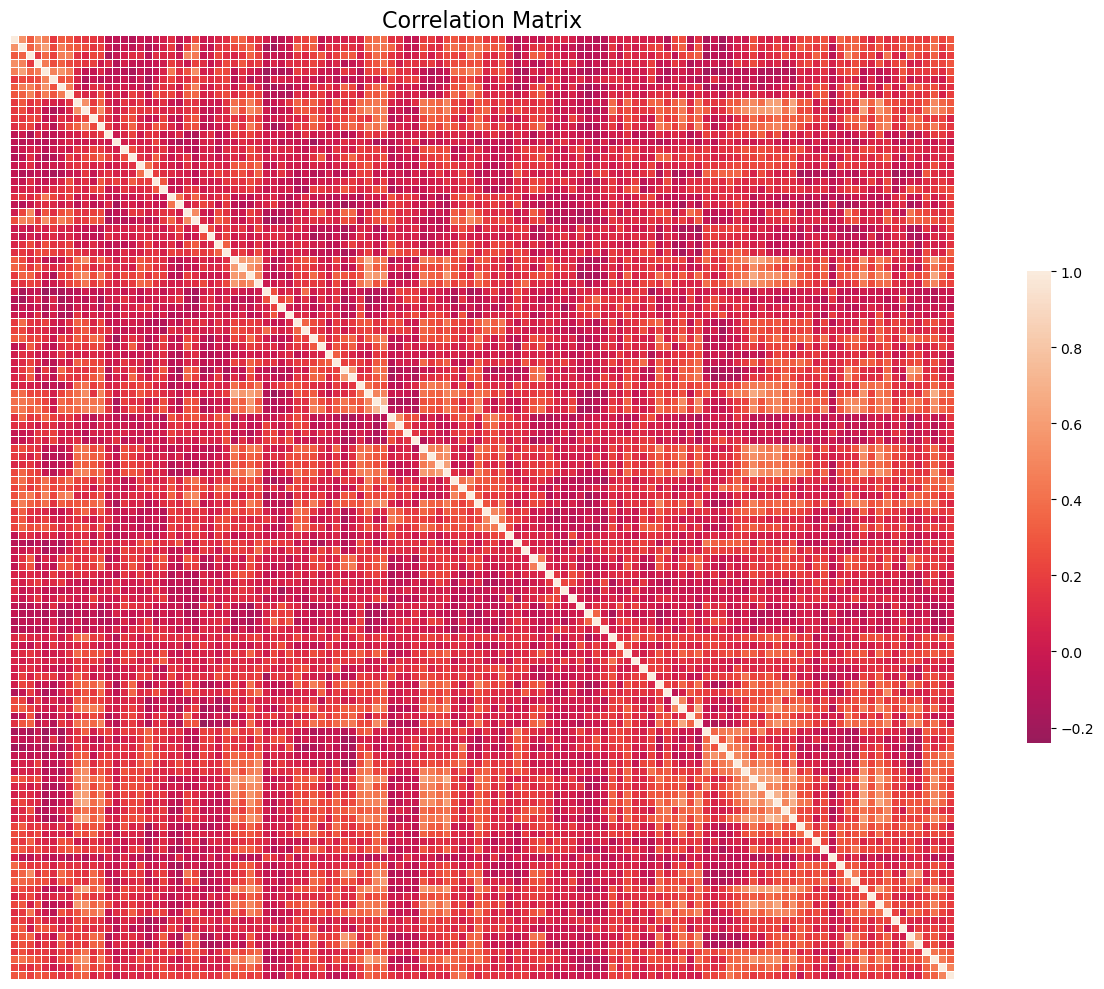

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Data Preparation -----
# Assuming data_frames_flattened is already defined and is a list of NumPy arrays or can be converted to one
X1 = np.array(W_1_flattened)  # Shape: (n_samples, n_features)

# ----- Step 2: Compute Correlation Matrix -----
# Set rowvar=False since each column represents a feature
corr_matrix = np.corrcoef(X1)

# Initialize the matplotlib figure with the desired size
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(
    corr_matrix, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix", fontsize=16)

# Adjust layout to make room for the title and ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


### Correlation between the weights for the SGD with batch size 5

In [17]:
with open(r"C:\Users\maorb\Desktop\Work\picklefiles\W_5.pickle", 'rb') as f:
    W_5 = pickle.load(f)

In [18]:
W_5_flattened = [W_5[i].flatten() for i in range(len(W_5))]

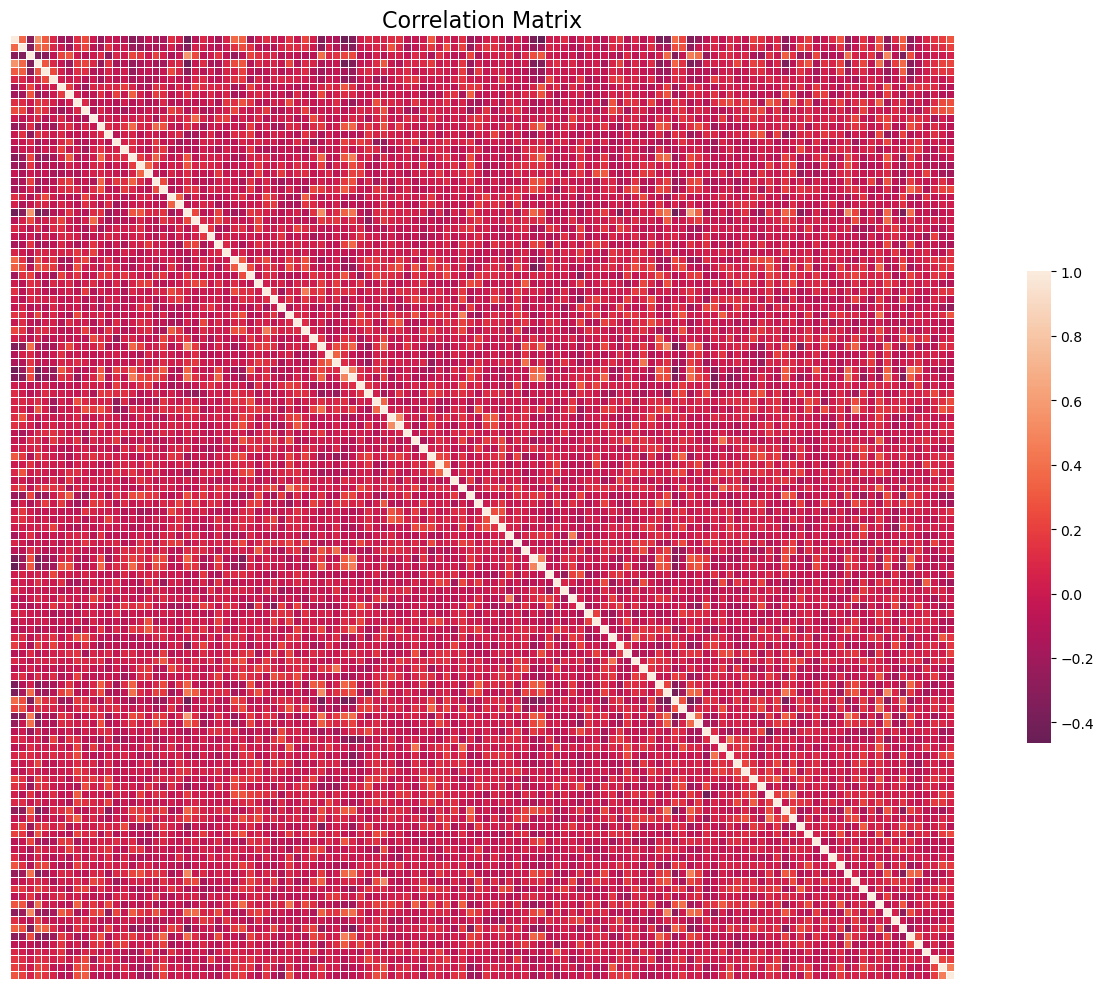

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Data Preparation -----
# Assuming data_frames_flattened is already defined and is a list of NumPy arrays or can be converted to one
X5 = np.array(W_5_flattened)  # Shape: (n_samples, n_features)

# ----- Step 2: Compute Correlation Matrix -----
# Set rowvar=False since each column represents a feature
corr_matrix = np.corrcoef(X5)

# Initialize the matplotlib figure with the desired size
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(
    corr_matrix, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix", fontsize=16)

# Adjust layout to make room for the title and ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


### Correlation between the weights for the SGD with batch size 50

In [21]:
with open(r"C:\Users\maorb\Desktop\Work\picklefiles\W_50.pickle", 'rb') as f:
    W_50 = pickle.load(f)

In [22]:
W_50_flattened = [W_50[i].flatten() for i in range(len(W_50))]

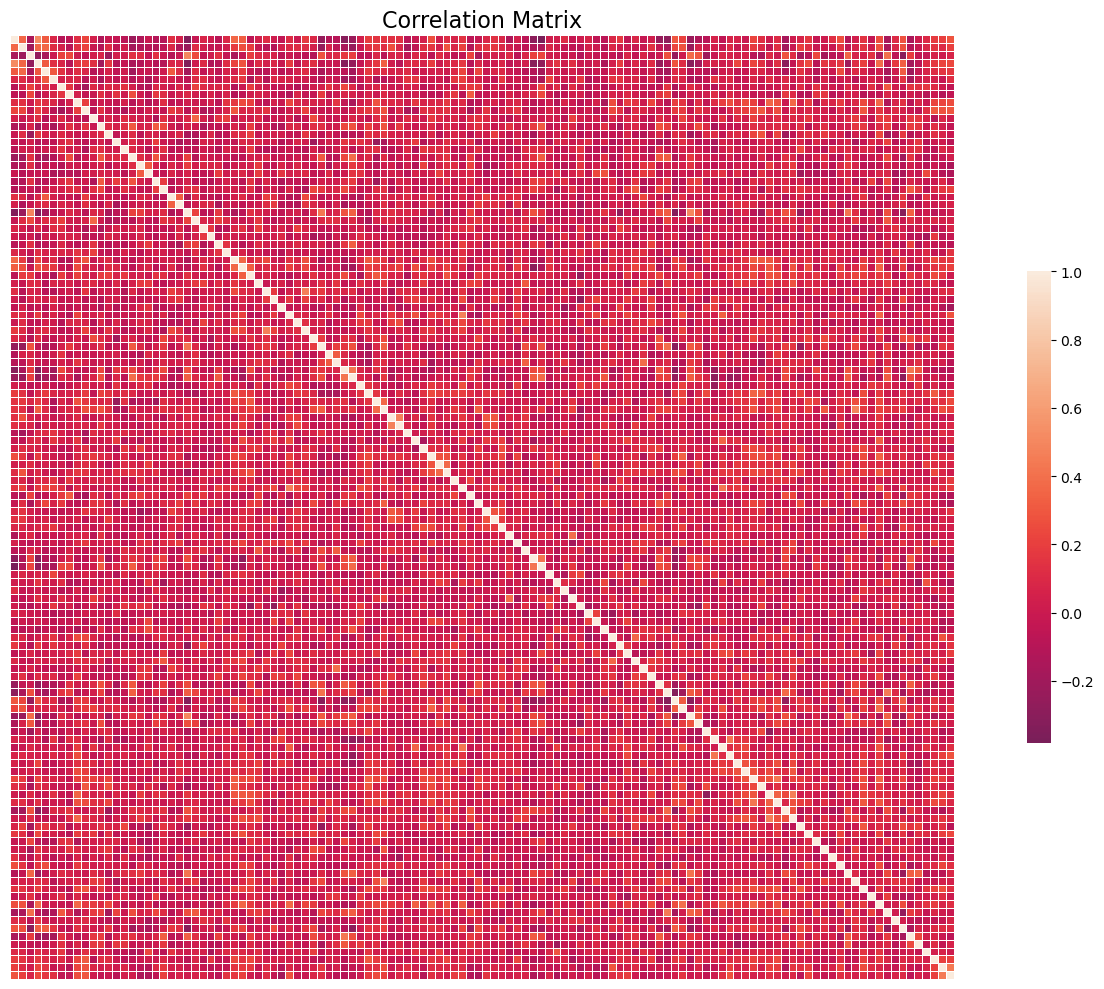

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Data Preparation -----
# Assuming data_frames_flattened is already defined and is a list of NumPy arrays or can be converted to one
X50 = np.array(W_50_flattened)  # Shape: (n_samples, n_features)

# ----- Step 2: Compute Correlation Matrix -----
# Set rowvar=False since each column represents a feature
corr_matrix = np.corrcoef(X50)

# Initialize the matplotlib figure with the desired size
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(
    corr_matrix, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix", fontsize=16)

# Adjust layout to make room for the title and ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


### Correlation between subject's matrices

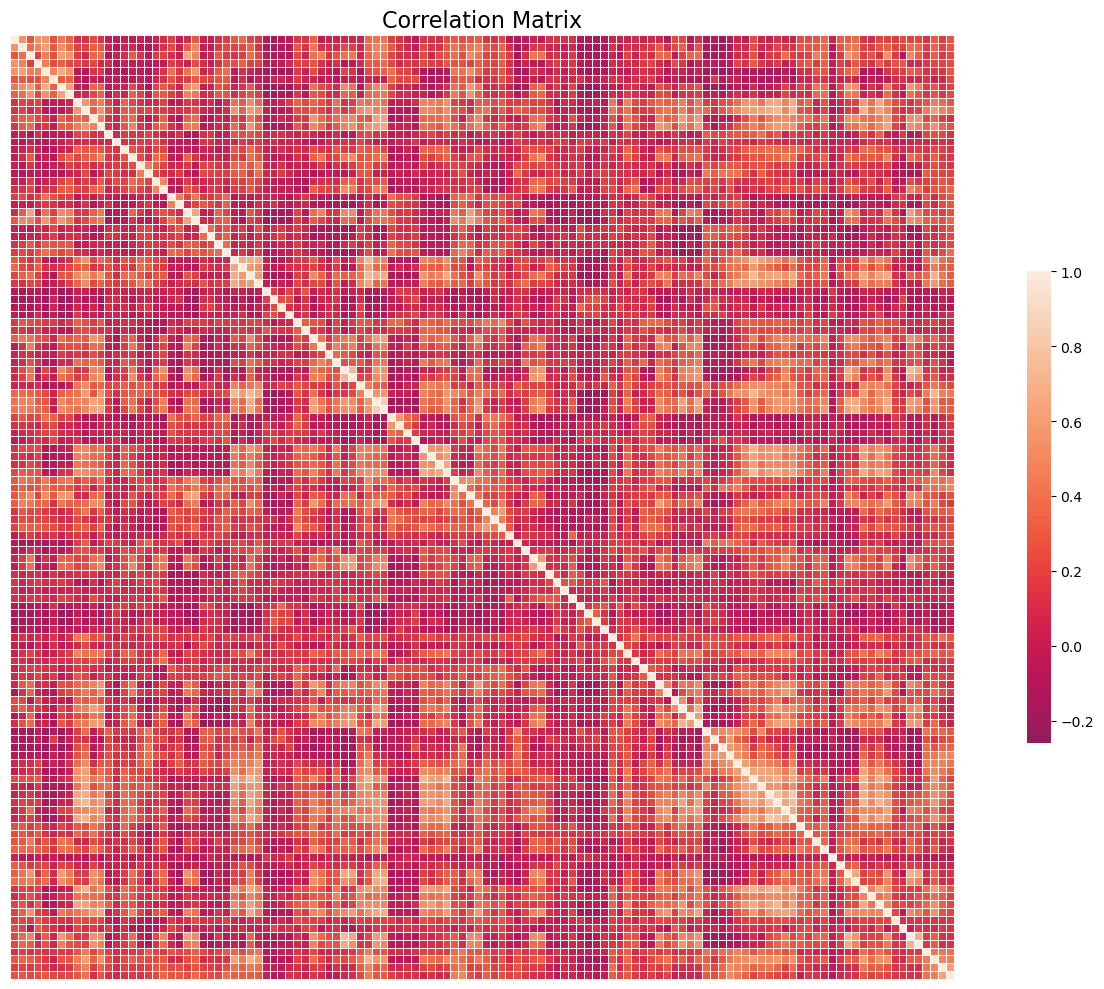

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Data Preparation -----
# Assuming data_frames_flattened is already defined and is a list of NumPy arrays or can be converted to one
X1 = np.array(data_frames_flattened)  # Shape: (n_samples, n_features)

# ----- Step 2: Compute Correlation Matrix -----
# Set rowvar=False since each column represents a feature
corr_matrix = np.corrcoef(X1)

# Initialize the matplotlib figure with the desired size
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(
    corr_matrix, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix", fontsize=16)

# Adjust layout to make room for the title and ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


## Different categories

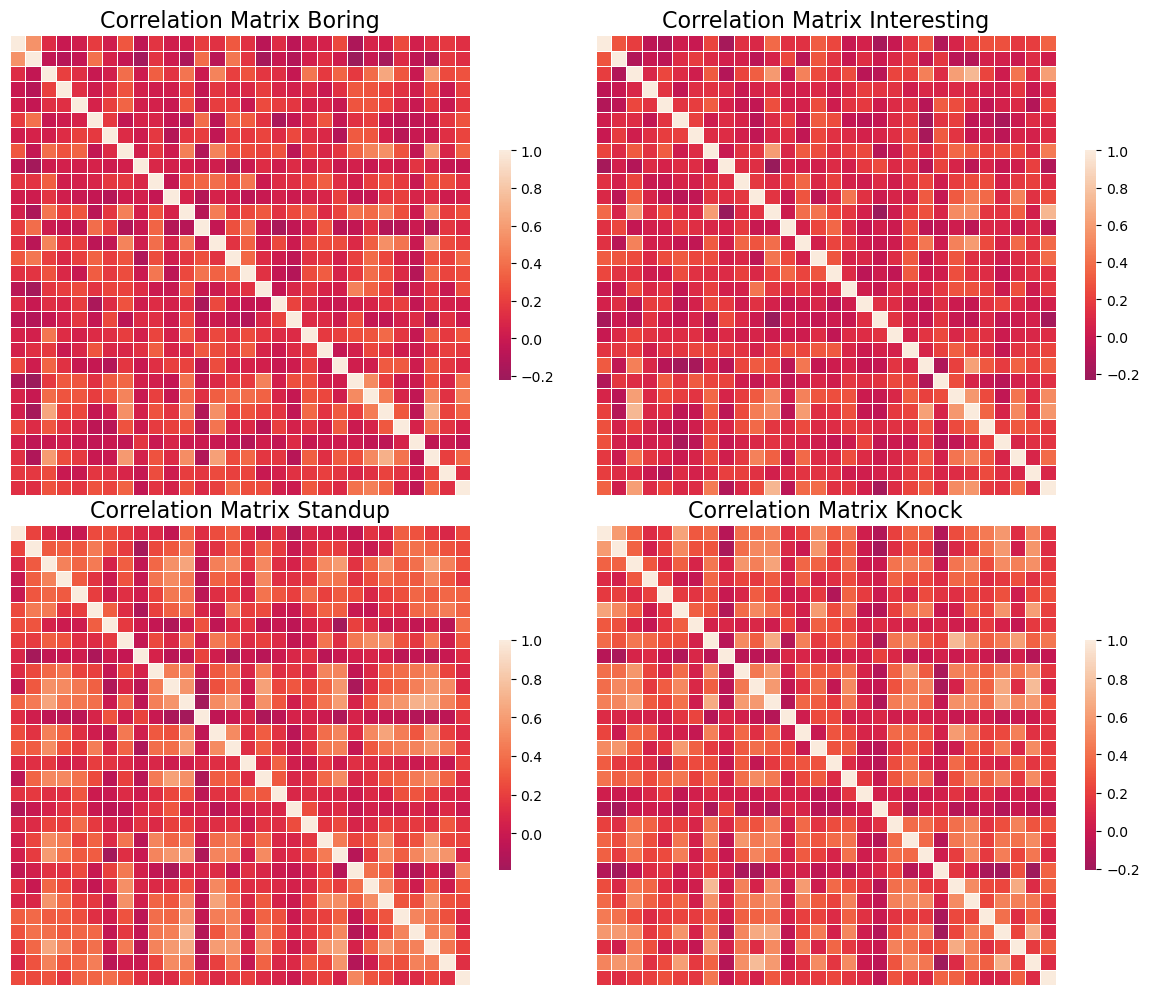

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Data Preparation -----
# Assuming data_frames_flattened is already defined and is a list of NumPy arrays or can be converted to one
X1 = np.array(data_frames_boring_flattened)  # Shape: (n_samples, n_features)
X2 = np.array(data_frames_interesting_flattened)    
X3 = np.array(data_frames_standup_flattened)    
X4 = np.array(data_frames_knock_flattened)

# ----- Step 2: Compute Correlation Matrix -----
# Set rowvar=False since each column represents a feature
corr_matrix1 = np.corrcoef(X1)
corr_matrix2 = np.corrcoef(X2)
corr_matrix3 = np.corrcoef(X3)
corr_matrix4 = np.corrcoef(X4)

# Initialize the matplotlib figure with the desired size
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
# Create the heatmap
sns.heatmap(
    corr_matrix1, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix Boring", fontsize=16)

plt.subplot(2, 2, 2)
# Create the heatmap
sns.heatmap(
    corr_matrix2, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix Interesting", fontsize=16)

plt.subplot(2, 2, 3)

# Create the heatmap

sns.heatmap(
    corr_matrix3, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap  
plt.title("Correlation Matrix Standup", fontsize=16)

plt.subplot(2, 2, 4)

# Create the heatmap

sns.heatmap(
    corr_matrix4, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix Knock", fontsize=16)



# Adjust layout to make room for the title and ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


### Interesting

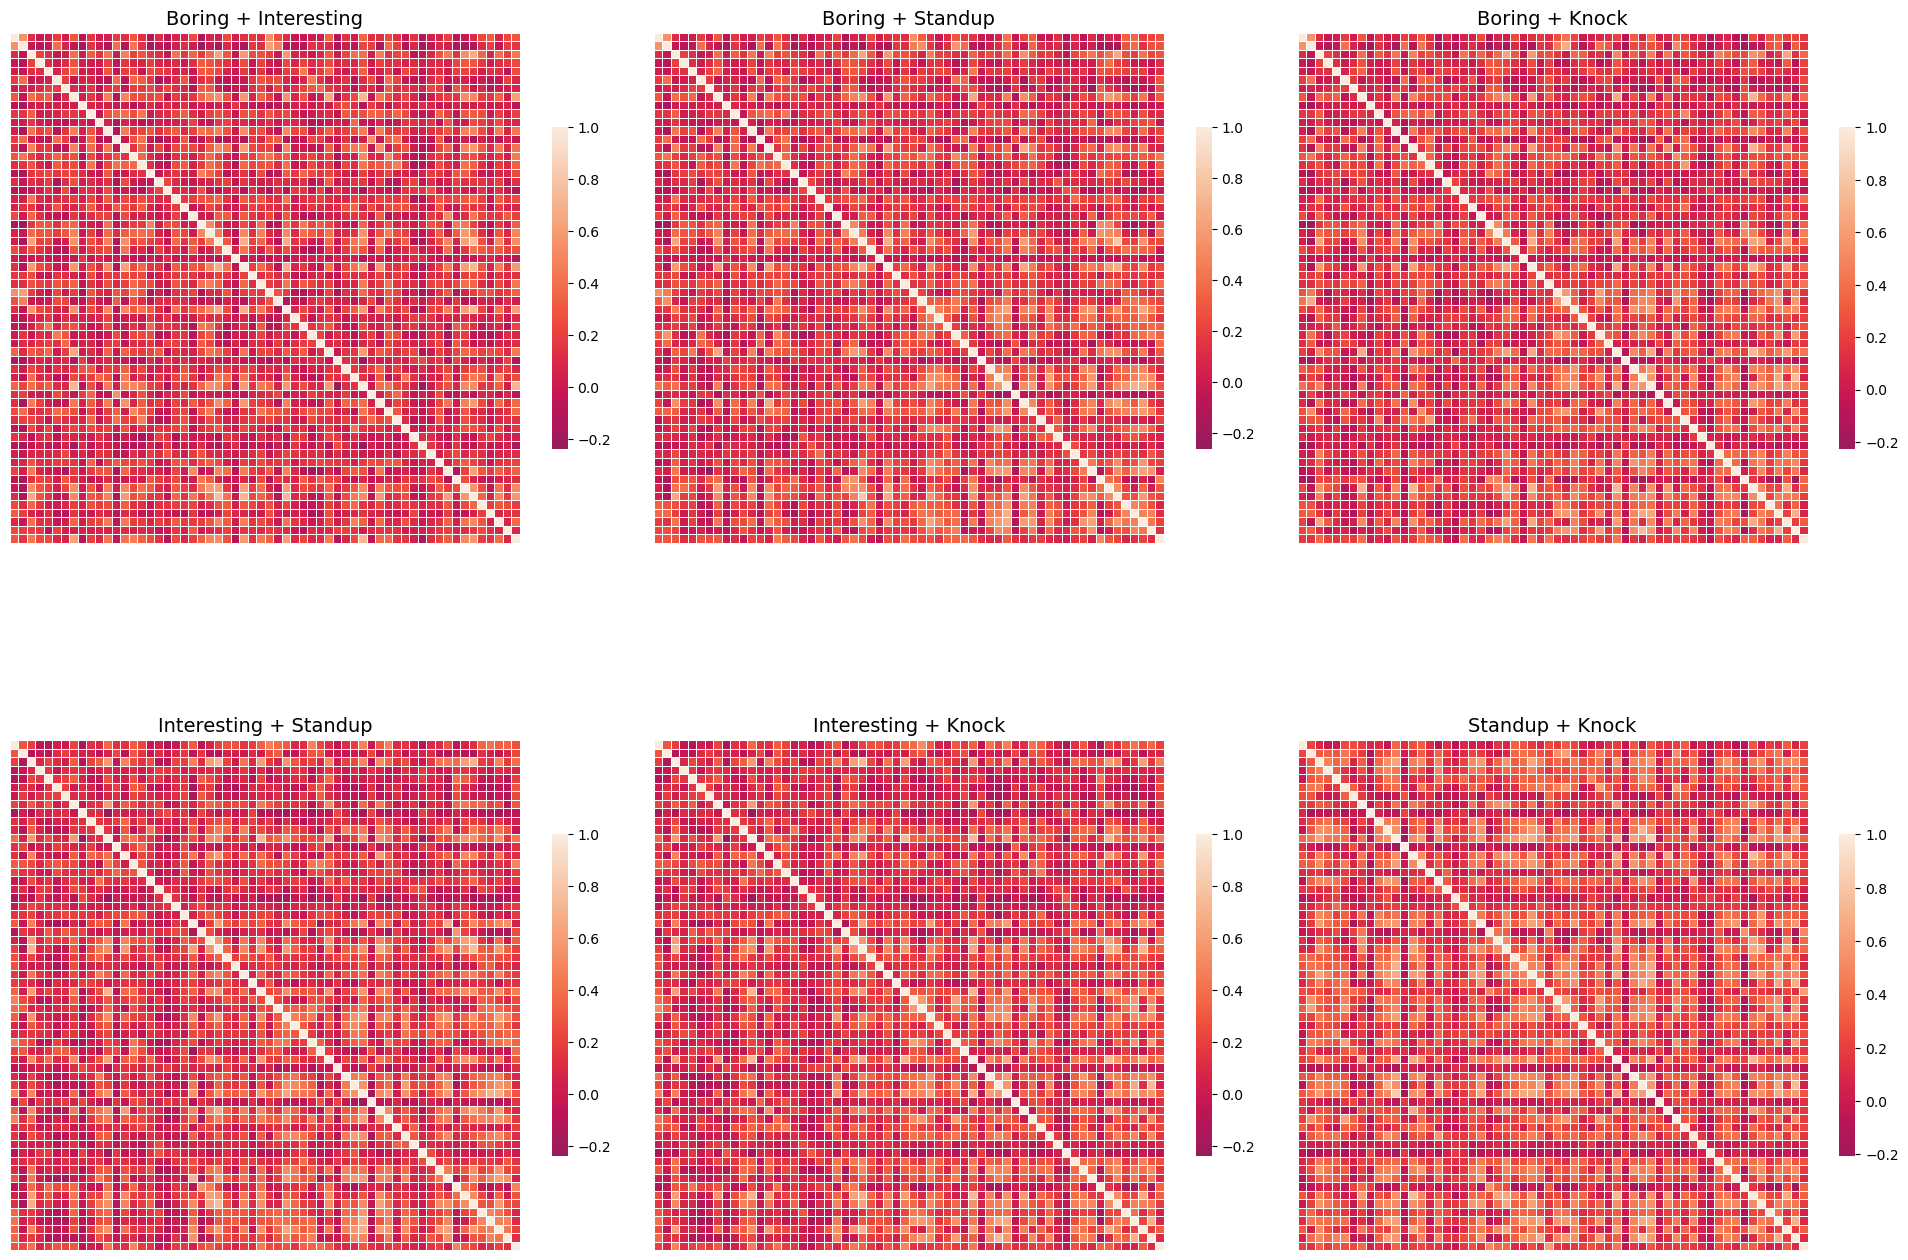

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Data Preparation -----
# Assuming data_frames_flattened is already defined and is a list of NumPy arrays or can be converted to one
X1 = np.array(data_frames_boring_flattened)       # Shape: (n_samples1, n_features)
X2 = np.array(data_frames_interesting_flattened)  # Shape: (n_samples2, n_features)
X3 = np.array(data_frames_standup_flattened)      # Shape: (n_samples3, n_features)
X4 = np.array(data_frames_knock_flattened)        # Shape: (n_samples4, n_features)

# ----- Step 2: Compute Individual Correlation Matrices -----
corr_matrix1 = np.corrcoef(X1)
corr_matrix2 = np.corrcoef(X2)
corr_matrix3 = np.corrcoef(X3)
corr_matrix4 = np.corrcoef(X4)

# ----- Step 3: Define Category Pairs -----
from itertools import combinations

categories = {
    "Boring": X1,
    "Interesting": X2,
    "Standup": X3,
    "Knock": X4
}

category_pairs = list(combinations(categories.keys(), 2))  # [('Boring', 'Interesting'), ...]

# Initialize a dictionary to store pairwise correlation matrices
pairwise_corr_matrices = {}

# ----- Step 4: Compute Pairwise Correlation Matrices -----
for pair in category_pairs:
    X_combined = np.vstack([categories[cat] for cat in pair])
    corr_matrix = np.corrcoef(X_combined)
    pairwise_corr_matrices[pair] = corr_matrix
plt.figure(figsize=(35, 30))
for idx, pair in enumerate(category_pairs, 1):
    cat1, cat2 = pair
    corr_matrix = pairwise_corr_matrices[pair]
    
    # Select a subset of features to visualize
    
    plt.subplot(2, 3, idx)
    sns.heatmap(
        corr_matrix,
        cmap='rocket',
        center=0,
        square=True,
        xticklabels=False,
        yticklabels=False,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
    )
    plt.title(f"{cat1} + {cat2}", fontsize=14)
plt.subplots_adjust(left=0.05, right=0.6, top=0.5, bottom=0.05, wspace=0.01, hspace=0.1)

plt.show()


## SRM Model

In [10]:
def W_i_calc3(X_i, S):
    X_S_T = np.dot(X_i, S.T)
    U_i, Sigma, V_i_T = np.linalg.svd(X_S_T, full_matrices=True)
    W_i = np.dot(U_i, V_i_T)
    return W_i

def SRM(X, tol=1e-3, max_iter=100):
    dist_vec = []
    indices = []
    W_i_vec = []
    W_i_new_vec = []
    delta_S_list = []
    delta_W_list = []
    n = 16
    m = len(X)
    W_i_new_group = np.ones((m, n, n))
    iter_count = 0
    converged = False
    k = 1
    S_old = np.ones((n, X.shape[2]))
    while not converged and iter_count < max_iter:
            S = sum(np.dot(W.T, X_i) for W, X_i in zip(W_i_new_group, X)) / m  # Compute S only once per iteration
            delta_S = np.linalg.norm(S - S_old, 'fro')**2
            delta_S_list.append(delta_S)
            delta_W_sum = 0.0
            if delta_S < tol:
                 print('Delta S is less than tolerance')    
            for j, X_i in enumerate(X):
                # Compute S for the current j
                #S = (1 / len(X)) * sum(np.dot(W.T, X_i) for W in W_i_new_group)
                W_old = W_i_new_group[j].copy()
                W_i_new_group[j] = W_i_calc3(X_i, S)
                delta_W = np.linalg.norm(W_i_new_group[j] - W_old, 'fro')**2
                delta_W_sum += delta_W

                # Calculate distance for convergence check
            dist = [np.linalg.norm(X_i - np.dot(W, S), 'fro')**2 for W in W_i_new_group]
            mean_W = delta_W_sum / len(X)
            delta_W_list.append(mean_W)
            mean_dist = np.mean(dist)
            dist_vec.append(mean_dist)
            indices.append(k)
            k += 1
            S_old = S
            print('iteration:', iter_count, 'mean distance:', mean_dist, 'mean W:', mean_W, 'delta S:', delta_S)
            if mean_dist < tol or mean_W < tol:
                converged = True

            iter_count += 1
            if iter_count >= max_iter:
                converged = True

        # We can find the argmin W_i of the function ||X - W_i @ S||^2 by finding the argmin of ||X - U_i @ D_i @ V_i^T @ S||^2 :

    return iter_count, W_i_new_group, S, dist_vec, delta_S_list, delta_W_list  

In [107]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def W_i_calc3(X_i, S):
    X_S_T = np.dot(X_i, S.T)
    U_i, Sigma, V_i_T = np.linalg.svd(X_S_T, full_matrices=False)
    W_i = np.dot(U_i, V_i_T)
    return W_i

def SRM(X, tol=1e-3, max_iter=100, verbose=False):
    dist_vec = []
    indices = []
    delta_S_list = []
    delta_W_list = []
    m, n_voxels, n_timepoints = X.shape
    k = n_voxels
    W_i_new_group = np.array([np.eye(n_voxels, k) for _ in range(m)])
    S_old = np.random.rand(k, n_timepoints)
    iter_count = 0
    converged = False

    while not converged and iter_count < max_iter:
        # Update S
        S = sum(np.dot(W_i.T, X_i) for W_i, X_i in zip(W_i_new_group, X)) / m
        delta_S = np.linalg.norm(S - S_old, 'fro')**2
        delta_S_list.append(delta_S)
        delta_W_sum = 0.0
        reconstruction_error_sum = 0.0
        recon_len = 0

        for j, X_i in enumerate(X):
            W_old = W_i_new_group[j].copy()
            W_i_new_group[j] = W_i_calc3(X_i, S)
            delta_W = np.linalg.norm(W_i_new_group[j] - W_old, 'fro')**2
            delta_W_sum += delta_W
            dist = np.linalg.norm(X_i - np.dot(W_i_new_group[j], S), 'fro')**2
            reconstruction_error_sum += dist
            recon_len += 1
            #print(f"Subject {j}, Delta W: {delta_W}")

        mean_W = delta_W_sum / m
        delta_W_list.append(mean_W)
        mean_dist = reconstruction_error_sum / recon_len
        dist_vec.append(mean_dist)
        indices.append(iter_count)

        if verbose:
            logger.info(f"Iteration: {iter_count}, Mean Distance: {mean_dist}, Mean W: {mean_W}, Delta S: {delta_S}")

        if mean_dist < tol or mean_W < tol:
            logger.info(f'Converged at iteration {iter_count} with mean distance: {mean_dist}, mean W: {mean_W}, and delta S: {delta_S}')
            converged = True

        S_old = S.copy()
        iter_count += 1
        
    logger.info(f'Final mean distance: {mean_dist}, mean W: {mean_W}, and delta S: {delta_S}')
    return iter_count, W_i_new_group, S, dist_vec, delta_S_list, delta_W_list


In [106]:
from scipy.stats import ortho_group
import logging
logging.basicConfig(level=logging.INFO) 
logger = logging.getLogger(__name__)

def W_i_calc3(X_i, S):
    X_S_T = np.dot(X_i, S.T)
    U_i, Sigma, V_i_T = np.linalg.svd(X_S_T, full_matrices=False)
    W_i = np.dot(U_i, V_i_T)
    return W_i

def Stochastic_SRM(X, batch_size, tol=1e-3, max_iter=1000, learning_rate=0.1,verbose=False):
    m, n_voxels, n_timepoints = X.shape
    k = n_voxels
    # Initialize W and S
    W_i_new_group = np.array([ortho_group.rvs(dim=k) for _ in X])
    S = np.random.rand(k, n_timepoints)
    S_old = S.copy()

    dist_vec = []
    delta_S_list = []
    delta_W_list = []
    indices = []

    iter_count = 0
    converged = False

    while not converged and iter_count < max_iter:
        sample_indices = np.arange(m)
        np.random.shuffle(sample_indices)

        # For a full iteration, we accumulate updates:
        W_change_accum = 0.0
        dist_accum = 0.0

        # Option 1: Update S after each batch (incrementally)
        # Or accumulate and update once at the end.
        # Below: accumulate and update once at the end of iteration:
        S_accum = np.zeros_like(S)

        for batch_start in range(0, m, batch_size):
            batch_indices = sample_indices[batch_start : batch_start + batch_size]

            # Compute batch contribution to S
            # Here we use the current W of just the batch subjects
            S_batch = sum(np.dot(W_i_new_group[i].T, X[i]) for i in batch_indices) / len(batch_indices)
            
            # Accumulate this batch's contribution for a full update at the end:
            S_accum +=  S_batch

            # Update W_i for this batch:
            batch_W_change = 0.0
            batch_dist = 0.0
            for subj_idx in batch_indices:
                X_i = X[subj_idx]
                W_old = W_i_new_group[subj_idx].copy()
                W_i_new_group[subj_idx] = W_i_calc3(X_i, S_batch)
                batch_W_change += np.linalg.norm(W_i_new_group[subj_idx] - W_old, 'fro')**2
                batch_dist += np.linalg.norm(X_i - np.dot(W_i_new_group[subj_idx], S_batch), 'fro')**2

            # Accumulate statistics
            W_change_accum += batch_W_change
            dist_accum += batch_dist

        # After processing all batches in this iteration:
        # Update S using accumulated average
        S_new = S_accum
        delta_S = np.linalg.norm(S_new - S, 'fro')**2
        delta_S_list.append(delta_S)
        S = S_new.copy()

        mean_W = W_change_accum / m
        mean_dist = dist_accum / m

        delta_W_list.append(mean_W)
        dist_vec.append(mean_dist)
        indices.append(iter_count)

        if verbose:
            logger.info(f"Iteration {iter_count}, Mean Distance: {mean_dist}, Mean Delta W: {mean_W}, Delta S: {delta_S}")

        if mean_dist < tol or mean_W < tol:
            logger.info(f'Converged at iteration {iter_count} with mean distance: {mean_dist}, mean W: {mean_W}, and delta S: {delta_S}')
            converged = True

        S_old = S.copy()
        iter_count += 1
    logger.info(f'Final mean distance: {mean_dist}, mean W: {mean_W}, and delta S: {delta_S}')
    return iter_count, W_i_new_group, S, dist_vec, delta_S_list, delta_W_list


***

In [108]:
iter_count, W_i_new_group, S, dist_vec, delta_S_list,delta_W_boring = SRM(dataframes1_trans_copy_boring, tol=1e-3, max_iter=1000)

INFO:__main__:Final mean distance: 1581.3964369875077, mean W: 0.6842342274479144, and delta S: 4.7541623131952606e-27


In [109]:
iter_count, W_i_new_group, S, dist_vec, delta_S_list,delta_W_interesting = SRM(dataframes1_trans_copy_interesting, tol=1e-3, max_iter=1000)

INFO:__main__:Final mean distance: 1713.4153003390418, mean W: 0.5634810364587807, and delta S: 8.146015729797181e-27


In [110]:
iter_count, W_i_new_group_standup, S_standup, dist_vec_standup, delta_S_list_standup,delta_W_standup = SRM(dataframes1_trans_copy_standup, tol=1e-3, max_iter=1000)

INFO:__main__:Converged at iteration 29 with mean distance: 3242.3416057354243, mean W: 0.0005360868062621024, and delta S: 0.0016562776292516975
INFO:__main__:Final mean distance: 3242.3416057354243, mean W: 0.0005360868062621024, and delta S: 0.0016562776292516975


In [111]:
iter_count, W_i_new_group_k, S_standup, dist_vec_k, delta_S_list_k,delta_W_k = SRM(dataframes1_trans_copy_knock, tol=1e-3, max_iter=1000)

INFO:__main__:Converged at iteration 141 with mean distance: 3572.9265766862086, mean W: 1.7901859504826334e-05, and delta S: 9.150799615595589e-08
INFO:__main__:Final mean distance: 3572.9265766862086, mean W: 1.7901859504826334e-05, and delta S: 9.150799615595589e-08


In [112]:
iter_count,W_i_st, S_st, dist_vec_st, delta_S_list_st, delta_W_list_st = Stochastic_SRM(dataframes1_trans_copy_standup, 50)

INFO:__main__:Converged at iteration 38 with mean distance: 3242.648263302921, mean W: 0.0008111888205328803, and delta S: 0.0021551705638336353
INFO:__main__:Final mean distance: 3242.648263302921, mean W: 0.0008111888205328803, and delta S: 0.0021551705638336353


In [30]:
dataframes1_trans_copy_standup[dataframes1_trans_copy_standup ==0]

array([0., 0., 0., ..., 0., 0., 0.])

(0.0, 2.0)

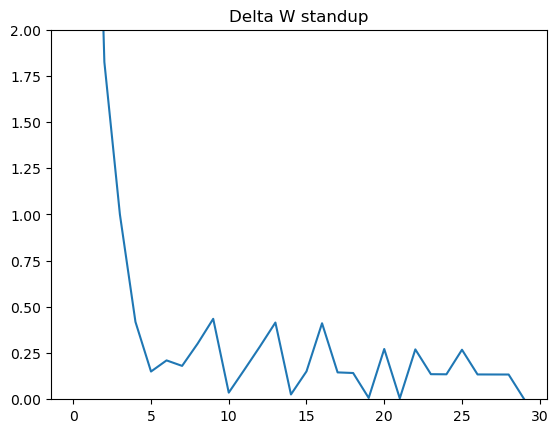

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
g2 = sns.lineplot(data=delta_W_standup)
g2.set(title='Delta W standup')
#plt.xlim(40,50)
plt.ylim(0,2)

(0.0, 2.0)

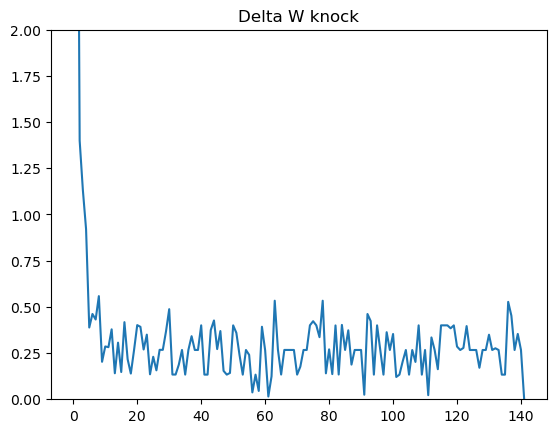

In [23]:
g2 = sns.lineplot(data=delta_W_k)
g2.set(title='Delta W knock')
#plt.xlim(40,50)
plt.ylim(0,2)

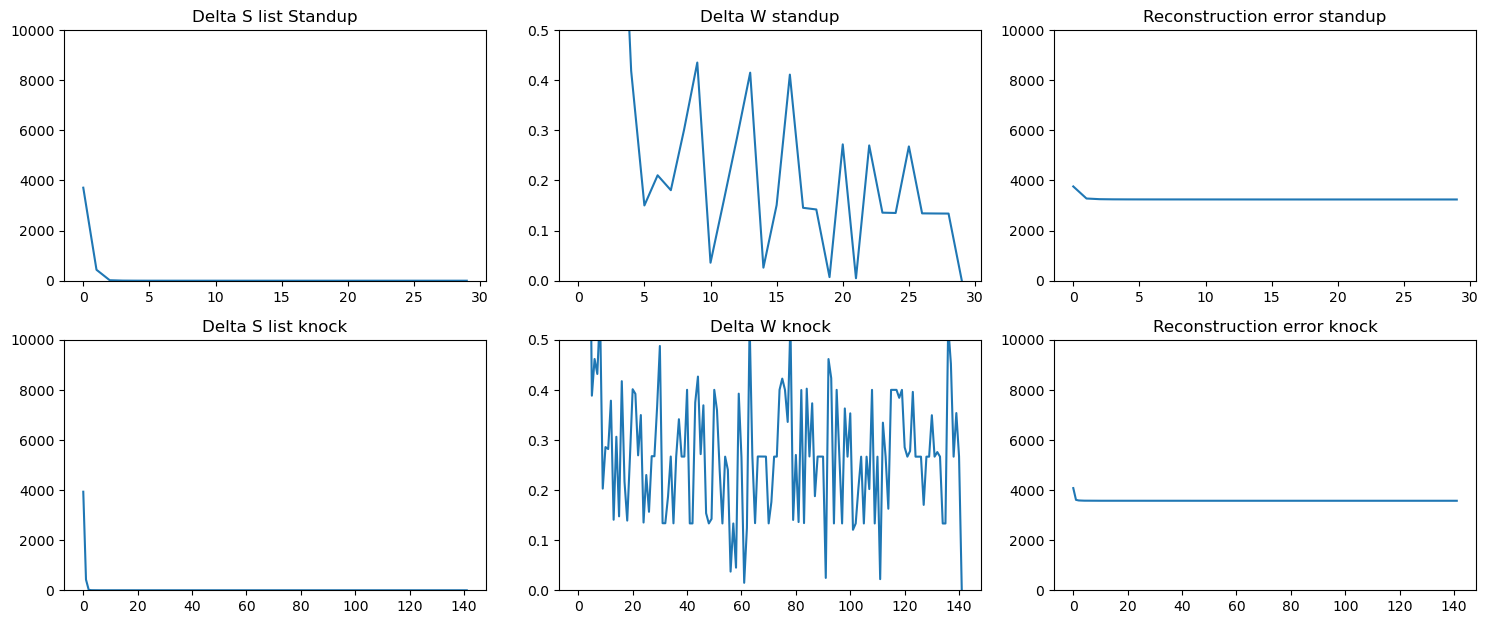

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and subplots
fig = plt.figure(figsize=(15, 10))
fig = plt.subplot(3, 3,1)

# Plot Delta S list Standup
plt.subplot(3, 3, 1)
g1 = sns.lineplot(data=delta_S_list_standup)
g1.set(title='Delta S list Standup',ylim = (0,10000))

# Plot Delta W standup
plt.subplot(3, 3, 2)
g2 = sns.lineplot(data=delta_W_standup)
g2.set(title='Delta W standup',ylim = (0,0.5))

# Plot Reconstruction error standup
plt.subplot(3, 3, 3)
g3 = sns.lineplot(data=dist_vec_standup)
g3.set(title='Reconstruction error standup',ylim = (0,10000))


# Create the figure and subplots

# Plot Delta S list Standup
plt.subplot(3, 3, 4)
g1 = sns.lineplot(data=delta_S_list_k)
g1.set(title='Delta S list knock',ylim = (0,10000))

# Plot Delta W standup
plt.subplot(3, 3, 5)
g2 = sns.lineplot(data=delta_W_k)
g2.set(title='Delta W knock',ylim = (0,0.5))

# Plot Reconstruction error standup
plt.subplot(3, 3, 6)
g3 = sns.lineplot(data=dist_vec_k)
g3.set(title='Reconstruction error knock',ylim = (0,10000))

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
plt.show()


# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
plt.show()


It seems that the distance 'converges' to approximately 2813

In [29]:
W_i_flattened = [W_i_new_group[i].flatten() for i in range(len(W_i_new_group))] 

The distances dont converge. Morover, the delta W don't converge (as expected). let's plot the correlation between the weights.

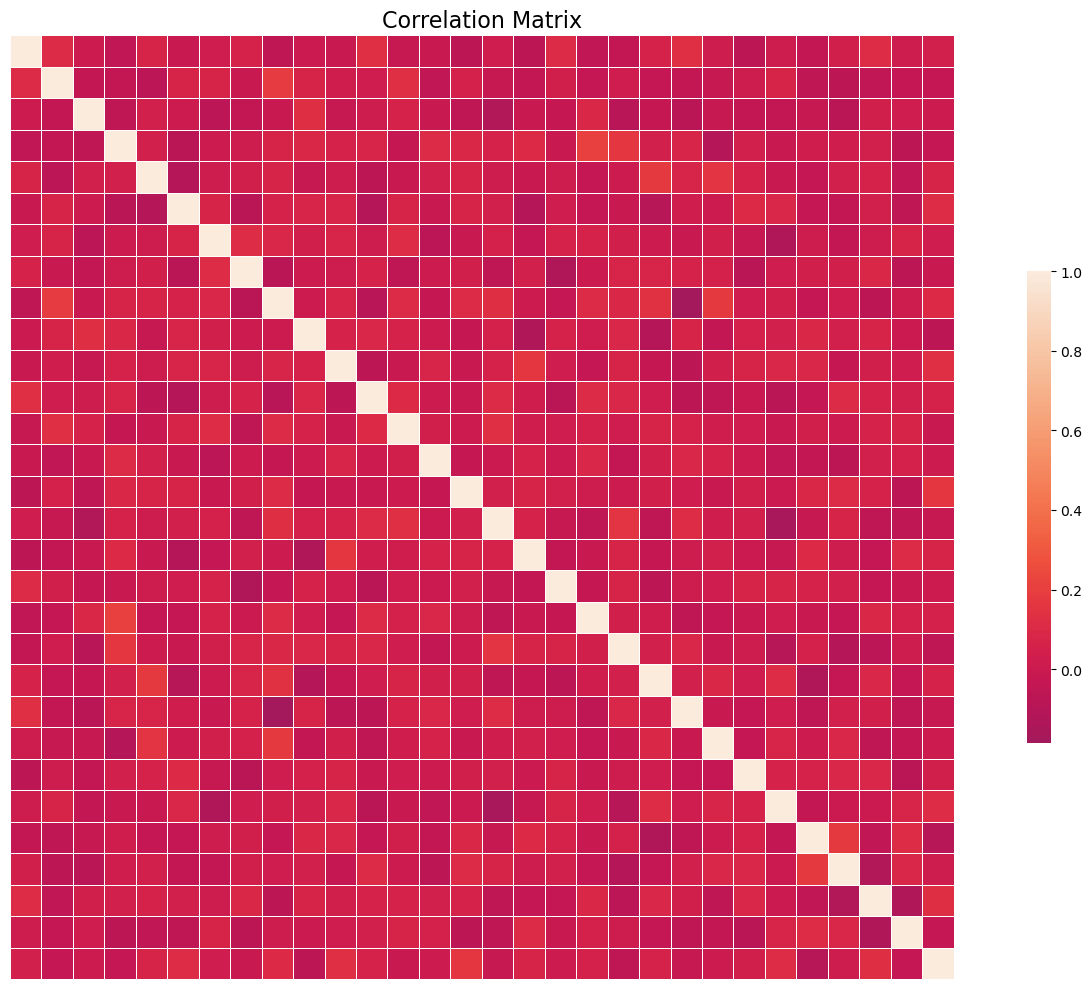

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Data Preparation -----
# Assuming data_frames_flattened is already defined and is a list of NumPy arrays or can be converted to one
Xi = np.array(W_i_flattened)  # Shape: (n_samples, n_features)

# ----- Step 2: Compute Correlation Matrix -----
# Set rowvar=False since each column represents a feature
corr_matrix = np.corrcoef(Xi)

# Initialize the matplotlib figure with the desired size
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(
    corr_matrix, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix", fontsize=16)

# Adjust layout to make room for the title and ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


## Different initiation for the weights didnt change it 

In [159]:
from scipy.stats import ortho_group
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def W_i_calc3(X_i, S):
    X_S_T = np.dot(X_i, S.T)
    U_i, Sigma, V_i_T = np.linalg.svd(X_S_T, full_matrices=False)
    W_i = np.dot(U_i, V_i_T)
    return W_i

def SRM_ort(X, tol=1e-3, max_iter=100, verbose=False):
    dist_vec = []
    indices = []
    delta_S_list = []
    delta_W_list = []
    m, n_voxels, n_timepoints = X.shape
    k = n_voxels
    W_i_new_group = np.array([ortho_group.rvs(dim=k) for _ in X])  # Initialize with random orthogonal matrices
    S_old = np.random.rand(k, n_timepoints)
    iter_count = 0
    converged = False

    while not converged and iter_count < max_iter:
        # Update S
        S = sum(np.dot(W_i.T, X_i) for W_i, X_i in zip(W_i_new_group, X)) / m
        delta_S = np.linalg.norm(S - S_old, 'fro')**2
        delta_S_list.append(delta_S)
        delta_W_sum = 0.0
        reconstruction_error_sum = 0.0
        recon_len = 0

        for j, X_i in enumerate(X):
            W_old = W_i_new_group[j].copy()
            W_i_new_group[j] = W_i_calc3(X_i, S)
            delta_W = np.linalg.norm(W_i_new_group[j] - W_old, 'fro')**2
            delta_W_sum += delta_W
            dist = np.linalg.norm(X_i - np.dot(W_i_new_group[j], S), 'fro')**2
            reconstruction_error_sum += dist
            recon_len += 1
            #print(f"Subject {j}, Delta W: {delta_W}")

        mean_W = delta_W_sum / m
        delta_W_list.append(mean_W)
        mean_dist = reconstruction_error_sum / recon_len
        dist_vec.append(mean_dist)
        indices.append(iter_count)

        if verbose:
            logger.info(f"Iteration {iter_count}, Mean Distance: {mean_dist}, Mean Delta W: {mean_W}, Delta S: {delta_S}")

        if mean_dist < tol or mean_W < tol:
            logger.info(f'Converged at iteration {iter_count} with mean distance: {mean_dist}, mean W: {mean_W}, and delta S: {delta_S}')
            converged = True

        S_old = S.copy()
        iter_count += 1
    logger.info(f'Final mean distance: {mean_dist}, mean W: {mean_W}, and delta S: {delta_S}')
    return iter_count, W_i_new_group, S, dist_vec, delta_S_list, delta_W_list


In [ ]:
count, W_i_ort_bor_filt, S_ort_bor_filt, dist_vec_ort_bor_filt, delta_S_list_ort_bor_filt, delta_W_list_ort_bor_filt = SRM_ort(np.array(dataframes1_1_trans_boring_filtered), tol=1e-3, max_iter=1000,
                                                                                                                               verbose=True)

In [ ]:
count, W_i_ort_bor_filt, S_ort_int_filt, dist_vec_ort_int_filt, delta_S_list_ort_int_filt, delta_W_list_ort_int_filt = SRM_ort(np.array(dataframes1_1_trans_interesting_filtered), tol=1e-3, max_iter=1000,
                                                                                                                               verbose=True)

In [ ]:
count, W_i_ort_stand_filt, S_ort_standup_filt, dist_vec_ort_standup_filt, delta_S_list_ort_standup_filt, delta_W_list_ort_standup_filt = SRM_ort(np.array(dataframes1_1_trans_copy_standup_filtered), tol=1e-3, max_iter=1000,
                                                                                                                                 verbose=True)

In [ ]:
count, W_i_ort_knock_filt, S_ort_knock_filt, dist_vec_ort_knock_filt, delta_S_list_ort_knock_filt, delta_W_list_ort_knock_filt = SRM_ort(np.array(dataframes1_1_trans_copy_knock_filtered), tol=1e-3, max_iter=1000,
                                                                                                                                 verbose=True)

In [ ]:
iter_count_ort, W_i_new_group_ort, S, dist_vec_ort, delta_S_list_ort, delta_W_list_ort = SRM_ort(dataframes1_trans_copy, tol=1e-3, max_iter=1000)

INFO:__main__:Final mean distance: 2813.409421848331, mean W: 0.49977147009623174, and delta S: 3.1129788033994295e-27


In [114]:
iter_count, W_i_boring_ort, S_boring_ort, dist_vec_boring_ort, delta_S_list_boring_ort ,delta_W_boring_ort = SRM_ort(dataframes1_trans_copy_boring, tol=1e-3, max_iter=1000)

INFO:__main__:Final mean distance: 1581.4615480903005, mean W: 0.9348213070933592, and delta S: 7.621611436875266e-27


In [115]:
iter_count, W_i_interesting_ort, S_interesting_ort, dist_vec_interesting_ort, delta_S_list_interesting_ort ,delta_W_interesting_ort = SRM_ort(dataframes1_trans_copy_interesting,
                                                                                                                                               tol=1e-3, max_iter=1000)

INFO:__main__:Final mean distance: 1713.4836650685372, mean W: 0.40591928077074324, and delta S: 7.968205871648627e-27


In [116]:
iter_count, W_i_standup_ort, S_standup_ort, dist_vec_standup_ort, delta_S_list_standup_ort ,delta_W_standup_ort = SRM_ort(dataframes1_trans_copy_standup, tol=1e-3, max_iter=1000)

INFO:__main__:Converged at iteration 28 with mean distance: 3242.5512990061293, mean W: 0.0007287724258461892, and delta S: 0.0013148381893872067
INFO:__main__:Final mean distance: 3242.5512990061293, mean W: 0.0007287724258461892, and delta S: 0.0013148381893872067


In [117]:
iter_count, W_i_knock_ort, S_knock_ort, dist_vec_knock_ort, delta_S_list_knock_ort ,delta_W_knock_ort = SRM_ort(dataframes1_trans_copy_knock, tol=1e-3, max_iter=1000)

INFO:__main__:Converged at iteration 164 with mean distance: 3572.720123639412, mean W: 0.0007002974353772867, and delta S: 2.4877077595935414e-05
INFO:__main__:Final mean distance: 3572.720123639412, mean W: 0.0007002974353772867, and delta S: 2.4877077595935414e-05


In [118]:
iter_count,W_i_st_ort, S_st_ort, dist_vec_st_ort, delta_S_list_st_ort, delta_W_list_st_ort = Stochastic_SRM(dataframes1_trans_copy,50)

INFO:__main__:Final mean distance: 2770.2832743860336, mean W: 1.2596490016740087, and delta S: 52.61314295710975


In [119]:
iter_count, W_i_st_ort_boring, S_st_ort_boring, dist_vec_st_ort_boring, delta_S_list_st_ort_boring, delta_W_list_st_ort_boring = Stochastic_SRM(dataframes1_trans_copy_boring,50)

INFO:__main__:Final mean distance: 1581.4220868845919, mean W: 0.9982877105664919, and delta S: 4.819488930506088e-27


In [120]:
iter_count, \
W_i_st_ort_interesting, \
S_st_ort_interesting, \
dist_vec_st_ort_interesting, \
delta_S_list_st_ort_interesting, \
delta_W_list_st_ort_interesting = Stochastic_SRM(dataframes1_trans_copy_interesting,50)

INFO:__main__:Final mean distance: 1713.4162563470709, mean W: 0.6054688497107676, and delta S: 1.2914978647348492e-26


In [121]:
iter_count, \
W_i_st_ort_standup, \
S_st_ort_standup, \
dist_vec_st_ort_standup, \
delta_S_list_st_ort_standup, \
delta_W_list_st_ort_standup = Stochastic_SRM(dataframes1_trans_copy_standup,50)

INFO:__main__:Converged at iteration 36 with mean distance: 3242.2179392061084, mean W: 0.00046819110155749816, and delta S: 0.000934626532440528
INFO:__main__:Final mean distance: 3242.2179392061084, mean W: 0.00046819110155749816, and delta S: 0.000934626532440528


In [122]:
iter_count, \
W_i_st_ort_knock, \
S_st_ort_knock, \
dist_vec_st_ort_knock, \
delta_S_list_st_ort_knock, \
delta_W_list_st_ort_knock = Stochastic_SRM(dataframes1_trans_copy_knock,50) 

INFO:__main__:Converged at iteration 370 with mean distance: 3572.7831113456705, mean W: 7.967504303008779e-05, and delta S: 3.3136943056569275e-26
INFO:__main__:Final mean distance: 3572.7831113456705, mean W: 7.967504303008779e-05, and delta S: 3.3136943056569275e-26


In [42]:
flattened_W_full = [W_i_new_group_ort[i].flatten() for i in range(len(W_i_new_group_ort))]
flattened_W_boring = [W_i_boring_ort[i].flatten() for i in range(len(W_i_boring_ort))]
flattened_W_interesting = [W_i_interesting_ort[i].flatten() for i in range(len(W_i_interesting_ort))]
flattened_W_standup = [W_i_standup_ort[i].flatten() for i in range(len(W_i_standup_ort))]
flattened_W_knock = [W_i_knock_ort[i].flatten() for i in range(len(W_i_knock_ort))]
flattened_W_st = [W_i_st_ort[i].flatten() for i in range(len(W_i_st_ort))]
flattened_W_st_boring = [W_i_st_ort_boring[i].flatten() for i in range(len(W_i_st_ort_boring))]
flattened_W_st_interesting = [W_i_st_ort_interesting[i].flatten() for i in range(len(W_i_st_ort_interesting))]
flattened_W_st_standup = [W_i_st_ort_standup[i].flatten() for i in range(len(W_i_st_ort_standup))]
flattened_W_st_knock = [W_i_st_ort_knock[i].flatten() for i in range(len(W_i_st_ort_knock))]


S_flatten_full = S.flatten()
S_flatten_boring = S_boring_ort.flatten()
S_flatten_interesting = S_interesting_ort.flatten()
S_flatten_standup = S_standup_ort.flatten()
S_flatten_knock = S_knock_ort.flatten()
S_flatten_st = S_st_ort.flatten()
S_flatten_st_boring = S_st_ort_boring.flatten()
S_flatten_st_interesting = S_st_ort_interesting.flatten()
S_flatten_st_standup = S_st_ort_standup.flatten()
S_flatten_st_knock = S_st_ort_knock.flatten()




In [ ]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def compute_correlations(list1, list2):
    #assert len(list1) == len(list2), "Lists must be of the same length"
    return np.array([pearsonr(a, b)[0] for a, b in zip(list1, list2)]) # for 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
boring_interesting_corr = compute_correlations(flattened_W_boring, flattened_W_interesting)
boring_standup_corr = compute_correlations(flattened_W_boring, flattened_W_standup)
boring_knock_corr = compute_correlations(flattened_W_boring, flattened_W_knock)
interesting_standup_corr = compute_correlations(flattened_W_interesting, flattened_W_standup)
interesting_knock_corr = compute_correlations(flattened_W_interesting, flattened_W_knock)
standup_knock_corr = compute_correlations(flattened_W_standup, flattened_W_knock)

boring_interesting_corr_st = compute_correlations(flattened_W_st_boring, flattened_W_st_interesting)
boring_standup_corr_st = compute_correlations(flattened_W_st_boring, flattened_W_st_standup)
boring_knock_corr_st = compute_correlations(flattened_W_st_boring, flattened_W_st_knock)
interesting_standup_corr_st = compute_correlations(flattened_W_st_interesting, flattened_W_st_standup)
interesting_knock_corr_st = compute_correlations(flattened_W_st_interesting, flattened_W_st_knock)
standup_knock_corr_st = compute_correlations(flattened_W_st_standup, flattened_W_st_knock)



In [45]:
SRM_ort_W_df = pd.DataFrame({'Boring vs Interesting': boring_interesting_corr, 'Boring vs Standup': boring_standup_corr, 'Boring vs Knock': boring_knock_corr,
              'Interesting vs Standup': interesting_standup_corr, 'Interesting vs Knock': interesting_knock_corr, 'Standup vs Knock': standup_knock_corr})

In [50]:
boring_interesting_corr.shape

(30,)

In [51]:
SRM_ort_W_df

,Boring vs Interesting,Boring vs Standup,Boring vs Knock,Interesting vs Standup,Interesting vs Knock,Standup vs Knock
0,-0.012545,0.006975,0.099203,0.071456,-0.075707,-0.099392
1,0.036475,0.056411,-0.008405,0.091969,0.067435,-0.038178
2,-0.005247,-0.005376,-0.001644,-0.044553,0.087061,-0.025858
3,0.017271,-0.007740,-0.089832,-0.084769,-0.027341,0.017986
4,0.014465,0.088101,-0.061416,0.046701,-0.021211,-0.054690
5,0.107978,-0.032516,0.042157,-0.030357,0.009930,-0.077835
6,0.066103,-0.067130,-0.050411,0.020889,-0.044014,-0.100707
7,-0.059081,-0.053165,-0.091859,0.018489,-0.046355,0.013968
8,0.014349,-0.098388,-0.003971,0.019034,0.034447,0.120742
9,-0.058787,-0.039992,0.002839,0.090425,0.055410,-0.073458


In [47]:
SRM_ort_W_df_st = pd.DataFrame({'Boring vs Interesting': boring_interesting_corr_st, 'Boring vs Standup': boring_standup_corr_st, 'Boring vs Knock': boring_knock_corr_st, 
                'Interesting vs Standup': interesting_standup_corr_st, 'Interesting vs Knock': interesting_knock_corr_st, 'Standup vs Knock': standup_knock_corr_st})

In [52]:
SRM_ort_W_df_st

,Boring vs Interesting,Boring vs Standup,Boring vs Knock,Interesting vs Standup,Interesting vs Knock,Standup vs Knock
0,0.030503,0.077027,0.074755,-0.056047,0.069587,-0.059840
1,0.009396,-0.020781,-0.059709,0.046648,-0.025557,-0.005792
2,-0.074532,-0.101075,0.020144,0.074595,-0.065626,0.043459
3,-0.014808,-0.101350,-0.032407,-0.023003,-0.006665,-0.022939
4,-0.047300,-0.040259,0.013094,0.025894,-0.068364,-0.095466
5,-0.068207,-0.101402,0.032520,0.039606,0.005350,0.021820
6,-0.067986,0.083987,0.071352,0.002916,0.116474,0.020807
7,0.038080,-0.005658,-0.035856,-0.092528,-0.055810,-0.035542
8,0.110552,0.027765,-0.043403,0.073531,-0.077741,0.002792
9,-0.118306,0.012285,0.068627,-0.002959,0.093888,0.010940


In [53]:
S_boring_interesting_corr = pearsonr(S_flatten_boring, S_flatten_interesting)[0]
S_boring_standup_corr = pearsonr(S_flatten_boring, S_flatten_standup)[0]
S_boring_knock_corr = pearsonr(S_flatten_boring, S_flatten_knock)[0]
S_interesting_standup_corr = pearsonr(S_flatten_interesting, S_flatten_standup)[0]
S_interesting_knock_corr = pearsonr(S_flatten_interesting, S_flatten_knock)[0]
S_standup_knock_corr = pearsonr(S_flatten_standup, S_flatten_knock)[0]


In [54]:
S_flatted_ort_df = pd.DataFrame({'Boring vs Interesting': S_boring_interesting_corr, 'Boring vs Standup': S_boring_standup_corr, 'Boring vs Knock': S_boring_knock_corr,
                'Interesting vs Standup': S_interesting_standup_corr, 'Interesting vs Knock': S_interesting_knock_corr, 'Standup vs Knock': S_standup_knock_corr}, index=[0])

In [55]:
S_flatted_ort_df

,Boring vs Interesting,Boring vs Standup,Boring vs Knock,Interesting vs Standup,Interesting vs Knock,Standup vs Knock
0,0.239424,-0.081207,-0.007407,-0.110865,-0.031776,-0.103083


In [56]:
S_boring_interesting_corr_st = pearsonr(S_flatten_st_boring, S_flatten_st_interesting)[0]
S_boring_standup_corr_st = pearsonr(S_flatten_st_boring, S_flatten_st_standup)[0]
S_boring_knock_corr_st = pearsonr(S_flatten_st_boring, S_flatten_st_knock)[0]
S_interesting_standup_corr_st = pearsonr(S_flatten_st_interesting, S_flatten_st_standup)[0]
S_interesting_knock_corr_st = pearsonr(S_flatten_st_interesting, S_flatten_st_knock)[0]
S_standup_knock_corr_st = pearsonr(S_flatten_st_standup, S_flatten_st_knock)[0]


In [57]:
S_flatten_ort_St_df = pd.DataFrame({'Boring vs Interesting': S_boring_interesting_corr_st, 'Boring vs Standup': S_boring_standup_corr_st, 'Boring vs Knock': S_boring_knock_corr_st,
                'Interesting vs Standup': S_interesting_standup_corr_st, 'Interesting vs Knock': S_interesting_knock_corr_st, 'Standup vs Knock': S_standup_knock_corr_st}, index=[0])

In [58]:
S_flatten_ort_St_df

,Boring vs Interesting,Boring vs Standup,Boring vs Knock,Interesting vs Standup,Interesting vs Knock,Standup vs Knock
0,-0.152368,0.171633,0.229117,-0.034911,0.061079,-0.312936


## Running SRM without columns with high proportion of zeros

In [123]:
iter_count, W_i_new_group, S, dist_vec, delta_S_list,delta_W_boring = SRM(dataframes1_1_trans_copy_boring, tol=1e-3, max_iter=1000)

INFO:__main__:Final mean distance: 1537.3227589943683, mean W: 0.8630617905680124, and delta S: 6.716808306231867e-12


In [124]:
iter_count, W_i_new_group_int, S_int, dist_vec_int, delta_S_list_int,delta_W_int = SRM(dataframes1_1_trans_copy_interesting, tol=1e-3, max_iter=1000)

INFO:__main__:Final mean distance: 1651.6702234115075, mean W: 0.650953106805067, and delta S: 7.145358133430471e-27


In [125]:
iter_count, W_i_new_group_knock, S, dist_vec_knock, delta_S_list_knock,delta_W_knock = SRM(dataframes1_1_trans_copy_knock, tol=1e-3, max_iter=1000)

INFO:__main__:Converged at iteration 331 with mean distance: 3491.5272417674887, mean W: 0.00042916158720728026, and delta S: 4.758859167789171e-17
INFO:__main__:Final mean distance: 3491.5272417674887, mean W: 0.00042916158720728026, and delta S: 4.758859167789171e-17


In [126]:
iter_count, W_i_new_group_standup, S_standup, dist_vec_standup, delta_S_list_standup,delta_W_standup = SRM(dataframes1_1_trans_copy_standup, tol=1e-3, max_iter=1000)

INFO:__main__:Converged at iteration 44 with mean distance: 3163.513699363418, mean W: 0.00022578995581789237, and delta S: 0.0004003384512398402
INFO:__main__:Final mean distance: 3163.513699363418, mean W: 0.00022578995581789237, and delta S: 0.0004003384512398402


In [127]:
## THe same but with ort SRM

iter_count, W_i_boring_ort, S_boring_ort, dist_vec_boring_ort, delta_S_list_boring_ort ,delta_W_boring_ort = SRM_ort(dataframes1_1_trans_copy_boring, tol=1e-3, max_iter=1000)


INFO:__main__:Final mean distance: 1537.4198206266437, mean W: 0.4492897362307449, and delta S: 1.5463465540575414e-17


In [128]:
## interesting

iter_count, W_i_interesting_ort, S_interesting_ort, dist_vec_interesting_ort, delta_S_list_interesting_ort ,delta_W_interesting_ort = SRM_ort(dataframes1_1_trans_copy_interesting,
                                                                                                                                               tol=1e-3, max_iter=1000)

INFO:__main__:Final mean distance: 1651.4807038823762, mean W: 0.6593720541301458, and delta S: 4.241880545064716e-27


In [129]:
## knock

iter_count, W_i_knock_ort, S_knock_ort, dist_vec_knock_ort, delta_S_list_knock_ort ,delta_W_knock_ort = SRM_ort(dataframes1_1_trans_copy_knock, tol=1e-3, max_iter=1000)

INFO:__main__:Converged at iteration 376 with mean distance: 3491.583115476599, mean W: 3.556921559852491e-05, and delta S: 6.991847773358476e-27
INFO:__main__:Final mean distance: 3491.583115476599, mean W: 3.556921559852491e-05, and delta S: 6.991847773358476e-27


In [130]:
## Standup
iter_count, W_i_standup_ort, S_standup_ort, dist_vec_standup_ort, delta_S_list_standup_ort ,delta_W_standup_ort = SRM_ort(dataframes1_1_trans_copy_standup,
                                                                                                                           tol=1e-3, max_iter=1000)

INFO:__main__:Converged at iteration 24 with mean distance: 3163.542799963239, mean W: 0.0004554325900048639, and delta S: 0.0010324845728991463
INFO:__main__:Final mean distance: 3163.542799963239, mean W: 0.0004554325900048639, and delta S: 0.0010324845728991463


In [131]:
iter_count,W_i_st_ort, S_st_ort, dist_vec_st_ort, delta_S_list_st_ort, delta_W_list_st_ort = Stochastic_SRM(dataframes1_1_trans_copy_knock, 50)

INFO:__main__:Converged at iteration 71 with mean distance: 3491.614569244471, mean W: 1.2735854309904041e-06, and delta S: 6.287692078427924e-09
INFO:__main__:Final mean distance: 3491.614569244471, mean W: 1.2735854309904041e-06, and delta S: 6.287692078427924e-09


In [132]:
iter_count, W_i_st_ort_boring, S_st_ort_boring, dist_vec_st_ort_boring, delta_S_list_st_ort_boring, delta_W_list_st_ort_boring = Stochastic_SRM(dataframes1_1_trans_copy_standup,50)

INFO:__main__:Converged at iteration 28 with mean distance: 3163.5928657872782, mean W: 8.882343376128298e-05, and delta S: 0.0001789961252450321
INFO:__main__:Final mean distance: 3163.5928657872782, mean W: 8.882343376128298e-05, and delta S: 0.0001789961252450321


# **Conclusions**

First of all, In the SRM algorithm we assume that the weights are orthogonal, which is a strong assumption.

This algorithm might converge with the correct implementation, as we can see in the GD and SGD with different batches. However, the reconstruction error is still converging to a relatively high value, but the delta W and delta S are converging. Moreover, we didn't assume that the weights are orthogonal in the different GD algorithms. 

Additionally, we got weight matrices acoording to the different implementations of the algorithm. We can try to investigate the correlation between the weights.





***

Maybe choose different columns for the weights, or different initialization for the weights.

For the weights

Take the correlation between pairs for each category, create batch size of random pairs without the actual pairs with bootstrap. check if the correlation is higher for the actual pairs.

Take the correlation between same weights for each subject, create batch size of random pairs without the actual pairs (same subjects) with bootstrap. check if the correlation is higher for the actual pairs.

Check correlation between different S matrices.

Check if the most vairance in eigenvectors are the same in differnt S and W matrices.



